In [1]:
import logging
logging.basicConfig(filename="logs.log", level=logging.INFO)
from tqdm import tqdm
from ENPMDA import MDDataFrame

In [2]:
from msm_a7_nachrs.tica.tica import TICAInitializer, SymTICAInitializer
from msm_a7_nachrs.manuscript.manuscript import *

<Figure size 432x288 with 0 Axes>

In [3]:
from msm_a7_nachrs.util.plotly_fes import generate_tica_csv, export_plotly, export_plotly_3d

In [4]:
import numpy as np
import pyemma
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import itertools

from scipy.signal import convolve2d
from scipy.ndimage import maximum_filter

## Construct TICA

In [5]:
md_dataframe = MDDataFrame.load_dataframe('./a7_apos_feature/a7_apos_feature_md_dataframe')

In [7]:
# lag time = lag time * dt ns

lag = 200
msm_obj = TICAInitializer(
                         md_dataframe=md_dataframe,
                         lag=lag,
                         start=lag,
                         end=-1,
                         system_exclusion=[],
                         updating=False,
                         in_memory=False
                         )

lag time is 200.0 ns
start time is 200.0 ns


In [8]:
start_seed_index = md_dataframe.dataframe[(md_dataframe.dataframe.seed == 0) & (md_dataframe.dataframe.frame == 0) & (md_dataframe.dataframe.ensemble == 'PRODUCTION')].system.unique() * 5

In [9]:
start_seed_index

array([0, 120, 240, 365, 485, 605], dtype=object)

In [10]:
feat_info = md_dataframe.get_feature_info('ca_distance_10A_2diff')
#resids_exclusion = list(range(280, 402)) + list(range(1,25)) + list(range(60, 75))
resids_exclusion = list(range(290, 395)) + list(range(1,25)) + list(range(60, 75))
feat_ind_exclusion = []
feat_ind_inclusion = []
for ind, feat in enumerate(feat_info):
    resid1 = eval(feat.split('_')[1])
    resid2 = eval(feat.split('_')[3])
    if resid1 in resids_exclusion or resid2 in resids_exclusion:
        feat_ind_exclusion.append(ind)
    else:
        feat_ind_inclusion.append(ind)

In [11]:
#msm_obj.add_feature('pore_hydration', feat_type='global')
msm_obj.add_feature('ca_distance_10A_2diff_reciprocal',
                    excluded_indices=feat_ind_exclusion,
                    feat_type='subunit')

added feature selection ca_distance_10A_2diff_reciprocal type: subunit, # of features: 2120


In [12]:
msm_obj.start_analysis(block_size=1000)
tica_concatenated = msm_obj.tica_concatenated
tica_output = msm_obj.tica_output
print(tica_concatenated.shape)

Start new TICA analysis


100%|██████████| 195/195 [00:58<00:00,  3.32it/s]


(901315, 341)


In [13]:
import seaborn as sns
sns.set_style("ticks")
sns.set_context(font_scale=1,context='poster')
sns.set_context({"figure.figsize": (12, 12)})

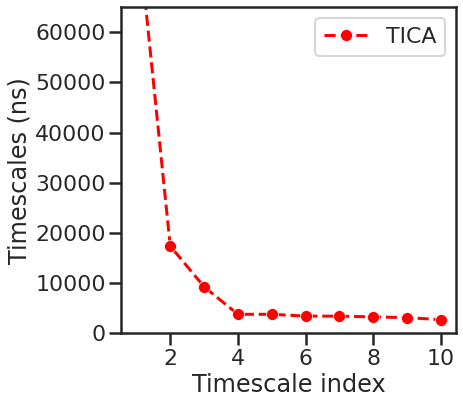

In [14]:
tica_model_tica = msm_obj.tica.fetch_model()
fig, ax = plt.subplots(figsize=(6,6))
n_timescales=10
tic_series = np.arange(1, 11)
time_series = tica_model_tica.timescales(k=n_timescales) * msm_obj.dt
sns.lineplot(x=tic_series,
             y=time_series,
             marker='o', linestyle='--', color='red', label='TICA')
ax.set_ylabel('Timescales (ns)')
ax.set_xlabel('Timescale index')
ax.set_ylim(0,65000)
plt.show()

## Load other dataframe

In [77]:
md_7ekt_dataframe = MDDataFrame.load_dataframe('./7ekt_feature/7ekt_feature_md_dataframe')
md_7ekt_dataframe.transform_to_logistic('ca_distance_10A_2diff', logistic=5)
md_7ekt_dataframe.transform_to_reciprocal('ca_distance_10A_2diff')
pair_indices_union_df_2diff = pd.read_pickle('pair_indices_union_df_2div.pickle')
min_arr = np.concatenate([pair_indices_union_df_2diff.distance_min.values]*5)
max_arr = np.concatenate([pair_indices_union_df_2diff.distance_max.values]*5)
md_7ekt_dataframe.transform_to_logistic_with_minmax(feature_name='ca_distance_10A_2diff',
                                            logistic=5,
                                            min_arr=min_arr,
                                            max_arr=max_arr)
tica_output_7ekt = msm_obj.transform_feature_trajectories(md_7ekt_dataframe)

100%|██████████| 4/4 [00:00<00:00, 369.75it/s]


Finish transforming to logistic.


100%|██████████| 4/4 [00:00<00:00, 362.35it/s]


Finish transforming to reciprocal.


100%|██████████| 4/4 [00:00<00:00, 374.92it/s]


Finish transforming to logistic.


100%|██████████| 4/4 [00:00<00:00, 132.14it/s]


In [78]:
md_df_dataframe = MDDataFrame.load_dataframe('./density_fitting_feature/DENSITY_FITTING_feature_md_dataframe')
md_df_dataframe.transform_to_logistic('ca_distance_10A_2diff', logistic=5)
md_df_dataframe.transform_to_reciprocal('ca_distance_10A_2diff')
md_df_dataframe.transform_to_logistic_with_minmax(feature_name='ca_distance_10A_2diff',
                                            logistic=5,
                                            min_arr=min_arr,
                                            max_arr=max_arr)
tica_output_df = msm_obj.transform_feature_trajectories(md_df_dataframe)

100%|██████████| 2/2 [00:00<00:00, 72.82it/s]


Finish transforming to logistic.


100%|██████████| 2/2 [00:00<00:00, 76.33it/s]

Finish transforming to reciprocal.



100%|██████████| 2/2 [00:00<00:00, 74.45it/s]

Finish transforming to logistic.



100%|██████████| 2/2 [00:00<00:00,  9.56it/s]


In [79]:
md_climber_dataframe = MDDataFrame.load_dataframe('./climber_feature/climber_feature_md_dataframe')
md_climber_dataframe.transform_to_logistic('ca_distance_10A_2diff', logistic=5)
md_climber_dataframe.transform_to_reciprocal('ca_distance_10A_2diff')
md_climber_dataframe.transform_to_logistic_with_minmax(feature_name='ca_distance_10A_2diff',
                                            logistic=5,
                                            min_arr=min_arr,
                                            max_arr=max_arr)
md_climber_dataframe.dataframe['pathway'] = md_climber_dataframe.dataframe.traj_name.apply(lambda x: x.split('/')[-3])
tica_output_climber = msm_obj.transform_feature_trajectories(md_climber_dataframe)

100%|██████████| 6/6 [00:00<00:00, 326.30it/s]


Finish transforming to logistic.


100%|██████████| 6/6 [00:00<00:00, 360.89it/s]


Finish transforming to reciprocal.


100%|██████████| 6/6 [00:00<00:00, 293.13it/s]


Finish transforming to logistic.


100%|██████████| 6/6 [00:00<00:00, 54.59it/s]


## Construct MSM

IC 1
-0.0014064256750334146
IC 2
-0.0059442873696068784
IC 3
-0.012430575084492303


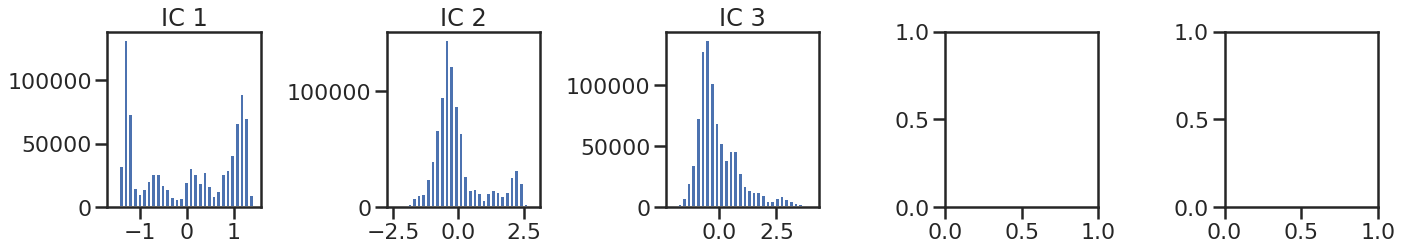

[0, 1, 2]


In [80]:
meaningful_tic = []
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for tic, ax in zip(range(5), axes):
    if np.abs(tica_concatenated[:, tic].T.mean()) > 1e-5: 
        print('IC ' + str(tic+1))
        print(tica_concatenated[:, tic].T.mean())
        ax.hist(tica_concatenated[:, tic].T, bins=30)
        meaningful_tic.append(tic)
        ax.set_title('IC ' + str(tic+1))
plt.tight_layout()
plt.show()
print(meaningful_tic)

In [81]:
vis_tic = [0,1]

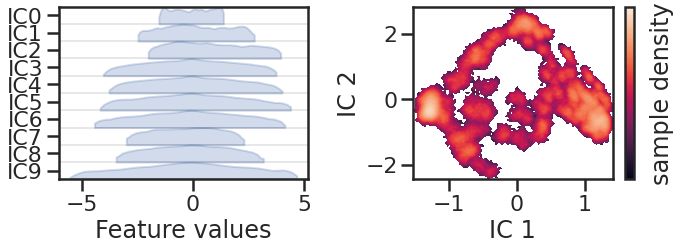

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated[:, :10],
    ax=axes[0],
    feature_labels=['IC' + str(tic) for tic in range(10)],
    ylog=True)
pyemma.plots.plot_density(*tica_concatenated[:, vis_tic].T, ax=axes[1], logscale=True)
axes[1].set_xlabel(f'IC {vis_tic[0]+1}')
axes[1].set_ylabel(f'IC {vis_tic[1]+1}')
fig.tight_layout()

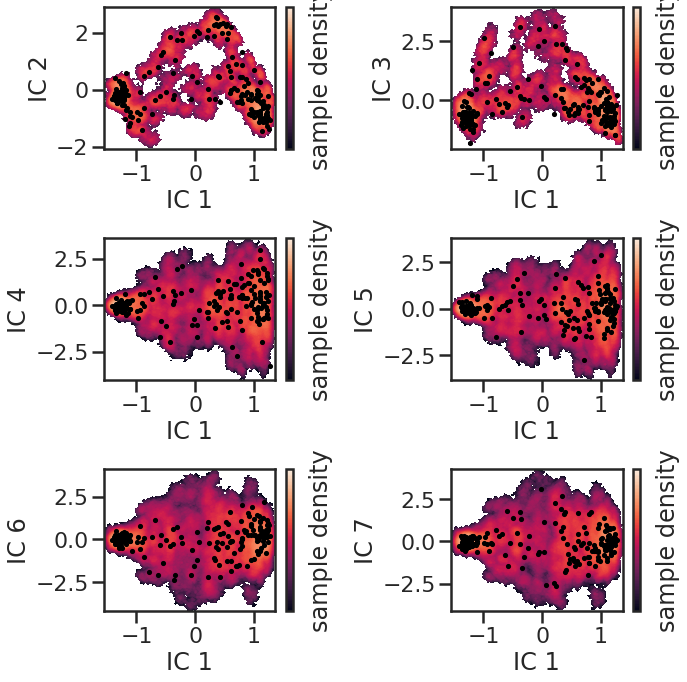

In [64]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for tica_ind, ax in zip(range(1,7), axes.flatten()):
    pyemma.plots.plot_density(*tica_concatenated[:, [0,tica_ind]].T, ax=ax, logscale=True)
    
    seed_id = 0
    for seed, tica_seed in enumerate(tica_output[::5]):
#        if seed in msm_obj.pathway_seed_start:
        color='black'
        ax.scatter(tica_seed[0, 0], tica_seed[0, tica_ind], color=color, s=10)
#        ax.text(tica_seed[0, 0]-0.2, tica_seed[0, tica_ind]+0.2, msm_obj.pathways[seed_id].split('_')[0], color=color)
        seed_id +=1
            
    ax.set_xlabel('IC 1')
    ax.set_ylabel('IC ' + str(tica_ind + 1))
fig.tight_layout()

### Other plots

In [83]:
generate_tica_csv(md_dataframe,
                  msm_obj,
                  sel_tics=[0,1,2,3,4],
                  output='tica_all_old_tica.csv')

fig = export_plotly_3d(tica_csv='tica_all_old_tica.csv',
                    output='apo_3d_oldtica.html',
                    title='FES apo')

  9%|▊         | 17/195 [00:02<00:22,  8.02it/s]


KeyboardInterrupt: 

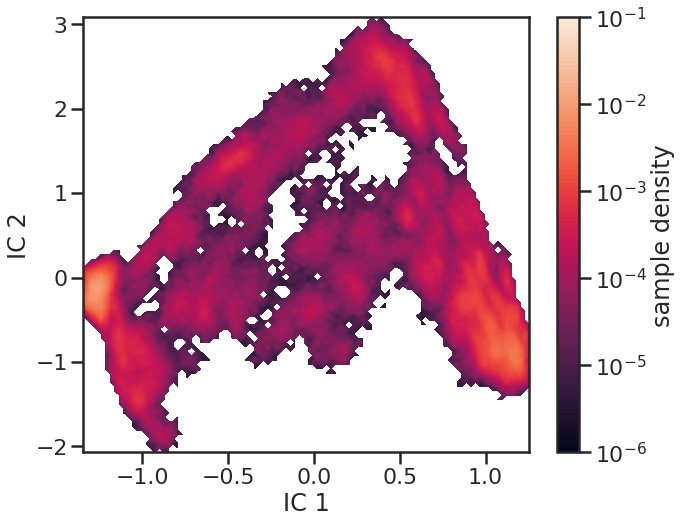

In [182]:
from matplotlib.ticker import LogLocator, MultipleLocator

fig, ax = plt.subplots(figsize=(10, 8))

_, _, misc = pyemma.plots.plot_density(*tica_concatenated[:, vis_tic].T, ax=ax, logscale=True)
#axes[1].scatter(tica_output_7ekt[0][:, 0], tica_output_7ekt[0][:, 1], s=5, c='blue')

ax.set_xlabel(f'IC {vis_tic[0]+1}')
ax.set_ylabel(f'IC {vis_tic[1]+1}')


misc['cbar'].set_ticks(LogLocator(base=10.0, numticks=15))

plt.savefig('Figures/tica_ca_dist_recip.png', dpi=300, bbox_inches='tight', pad_inches=0.1, transparent=True)

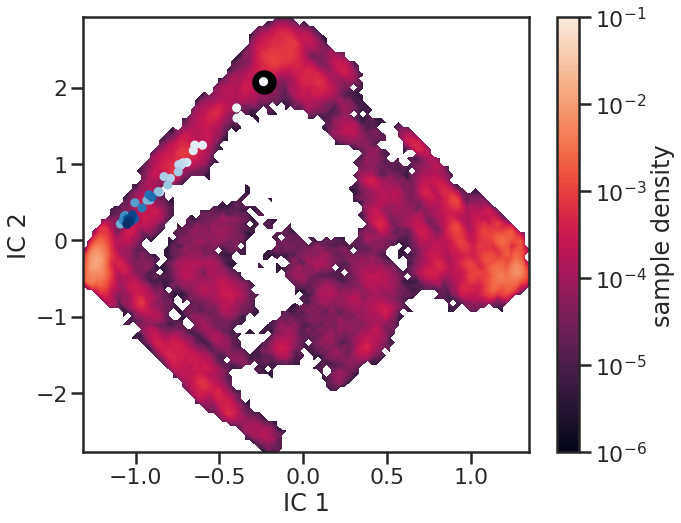

In [72]:
from matplotlib.ticker import LogLocator, MultipleLocator

fig, ax = plt.subplots(figsize=(10, 8))

_, _, misc = pyemma.plots.plot_density(*tica_concatenated[:, vis_tic].T, ax=ax, logscale=True)
ax.scatter(tica_output_7ekt[0][0, vis_tic[0]], tica_output_7ekt[0][0, vis_tic[1]], s=500, c='black')
ax.scatter(tica_output_7ekt[0][:, vis_tic[0]], tica_output_7ekt[0][:, vis_tic[1]], s=50, cmap='Blues', c=range(len(tica_output_7ekt[0])))

ax.set_xlabel(f'IC {vis_tic[0]+1}')
ax.set_ylabel(f'IC {vis_tic[1]+1}')

misc['cbar'].set_ticks(LogLocator(base=10.0, numticks=15))

#plt.savefig('Figures/tica_ca_dist_proj.png', dpi=300, bbox_inches='tight', pad_inches=0.1, transparent=True)

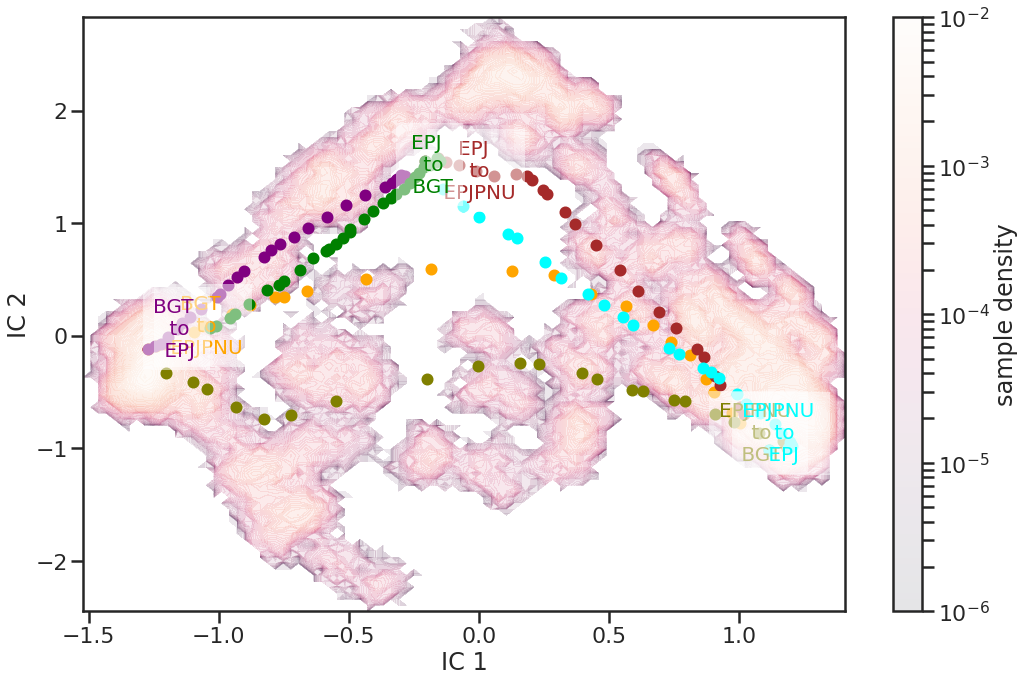

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=ax, logscale=True, alpha=0.1)
colors = ['orange', 'purple', 'brown', 'green', 'olive', 'cyan']

for climber_traj, pathway, color in zip(tica_output_climber[::5], md_climber_dataframe.dataframe['pathway'].unique(), colors):
    ax.scatter(*climber_traj[:, :2].T, s=100, c=color, label=' to '.join(pathway.split('_')))
    ax.text(*climber_traj[4, :2].T, ' \n to\n '.join(pathway.split('_')), color=color, fontsize=20,
            ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=10.0))

ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()

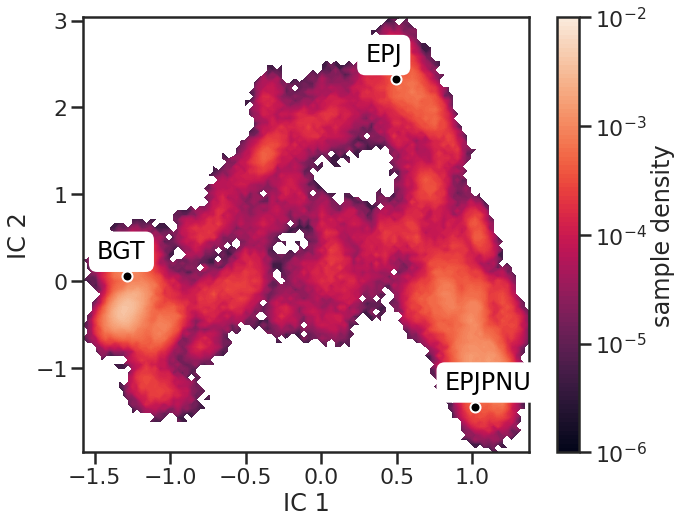

In [24]:
from matplotlib.ticker import LogLocator, MultipleLocator

fig, ax = plt.subplots(figsize=(10, 8))

_, _, misc = pyemma.plots.plot_density(*tica_concatenated[:, vis_tic].T, ax=ax, logscale=True)

for seed, tica_seed in enumerate(tica_output):
    if seed in start_seed_index[::2]:
#    if seed % 5 == 0:

        color='black'
        ax.scatter(tica_seed[0, vis_tic[0]], tica_seed[0, vis_tic[1]], color=color, s=100, edgecolors='white')
        ax.text(tica_seed[0, vis_tic[0]]-0.2, tica_seed[0, vis_tic[1]]+0.2, md_dataframe.dataframe[md_dataframe.dataframe.system==seed // 5].pathway.to_list()[0].split('_')[0], color=color,
        bbox=dict(boxstyle="round",
                ec=(1., 1, 1),
                fc=(1., 1, 1),
                alpha=1
                )
        )

ax.set_xlabel(f'IC {vis_tic[0]+1}')
ax.set_ylabel(f'IC {vis_tic[1]+1}')

misc['cbar'].set_ticks(LogLocator(base=10.0, numticks=15))

#plt.savefig('Figures/tica_ca_dist_proj.png', dpi=300, bbox_inches='tight', pad_inches=0.1, transparent=True)

### Microstates

In [19]:
meaningful_tic = [0, 1]

In [20]:
tica_output_filter = [np.asarray(output)[:,meaningful_tic] for output in tica_output]

In [21]:
cross_validation = False
if cross_validation:
    n_clustercenters = [50, 200, 500, 1000, 2000, 4000]

    scores = np.zeros((len(n_clustercenters), 5))
    for n, k in enumerate(n_clustercenters):
        for m in range(5):
            d_cluster = pyemma.coordinates.cluster_kmeans(tica_output_filter,
                                                          k=k,
                                                          max_iter=100,
                                                          stride=100)
            d_cluster_dtrajs = d_cluster.dtrajs
            _msm = pyemma.msm.estimate_markov_model(d_cluster_dtrajs, 100)
            scores[n, m] = _msm.score_cv(
                d_cluster_dtrajs, n=1, score_method='VAMP2', score_k=min(10, k))
#            print(scores[n, m])

In [22]:
if cross_validation:
    fig, ax = plt.subplots()
    lower, upper = pyemma.util.statistics.confidence_interval(scores.T.tolist(), conf=0.9)
    ax.fill_between(n_clustercenters, lower, upper, alpha=0.3)
    ax.plot(n_clustercenters, np.mean(scores, axis=1), '-o')
    ax.semilogx()
    ax.set_xlabel('number of cluster centers')
    ax.set_ylabel('VAMP-2 score')
    fig.tight_layout()

In [23]:
msm_obj.clustering_with_deeptime(meaningful_tic=meaningful_tic,
                   n_clusters=1000, updating=False)

Start new cluster analysis


KMeans iterations: 100%|██████████| 102/102 [01:33<00:00,  1.09it/s] 


In [24]:
cluster = msm_obj.cluster
cluster_centers = msm_obj.cluster_centers
cluster_dtrajs = msm_obj.cluster_dtrajs
dtrajs_concatenated = msm_obj.dtrajs_concatenated

In [51]:
sel_tic = [0, 1]

fig, ax = plt.subplots(figsize=(6, 6))
pyemma.plots.plot_density(
    *tica_concatenated[:, sel_tic].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster_centers[:, sel_tic].T, s=5, c='C1')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()

NameError: name 'plt' is not defined

Start new ITS analysis


ITS: 100%|██████████| 10/10 [03:00<00:00, 18.07s/it]


Keep ITS analysis


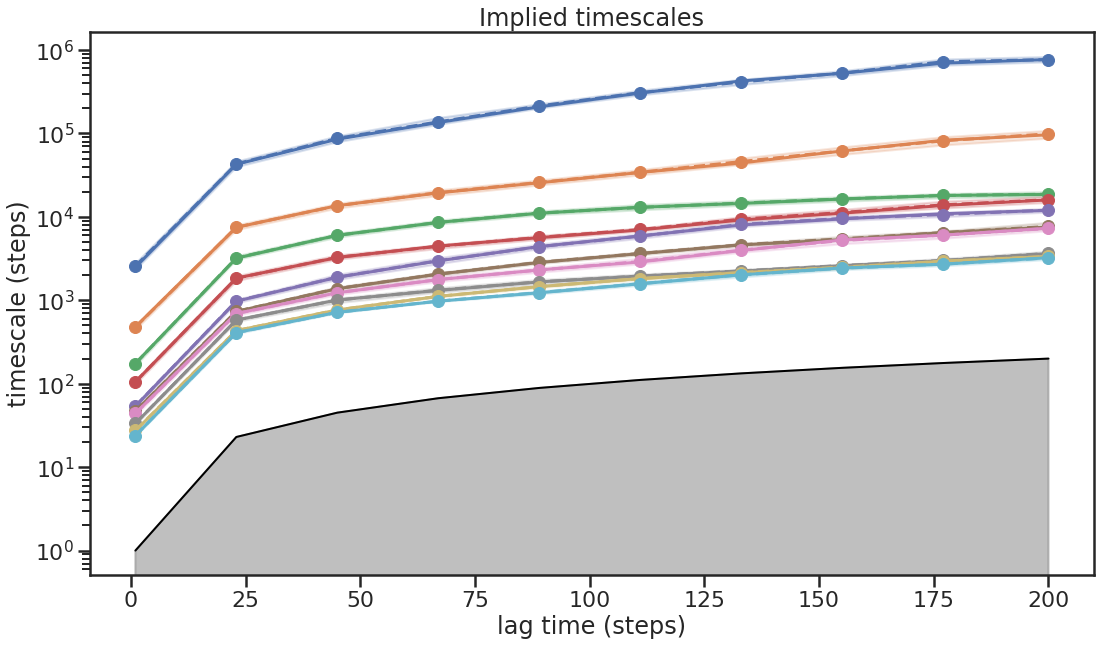

In [39]:
its = msm_obj.get_its(cluster='deeptime', n_samples=100, n_jobs=10)
msm_obj.plot_its()

In [26]:
msm_model = msm_obj.get_bayesian_msm(lag=lag, cluster='deeptime')

print('fraction of states used = {:.5f}'.format(msm_model.prior.state_fraction))
print('fraction of states used = {:.5f}'.format(msm_model.prior.count_fraction))

Start new MSM analysis
fraction of states used = 1.00000
fraction of states used = 1.00000


In [27]:
if msm_model.prior.state_fraction != 1.0:
    active_set = msm_model.prior.count_model.states_to_symbols(msm_model.prior.count_model.states)
    inactive_set = list(set(range(msm_model.prior.count_model.n_states_full)).difference(set(active_set)))
    print('Unconnected states:', inactive_set)

    fig, ax = plt.subplots(figsize=(6, 6))

    pyemma.plots.plot_density(
        *tica_concatenated[:, meaningful_tic[:2]].T, ax=ax, cbar=False, alpha=0.3)
    ax.scatter(*cluster_centers[active_set, :2].T, s=5, c='C1')
    ax.scatter(*cluster_centers[inactive_set, :2].T, s=50, c='black')
    ax.set_xlabel('IC 1')
    ax.set_ylabel('IC 2')
    fig.tight_layout()

In [28]:
sel_tic = [0, 2]
if msm_model.prior.state_fraction != 1.0:
    active_set = msm_model.prior.count_model.states_to_symbols(msm_model.prior.count_model.states)
    inactive_set = list(set(range(msm_model.prior.count_model.n_states_full)).difference(set(active_set)))
    print('Unconnected states:', inactive_set)

    fig, ax = plt.subplots(figsize=(6, 6))

    pyemma.plots.plot_density(
        *tica_concatenated[:, sel_tic].T, ax=ax, cbar=False, alpha=0.3)
    ax.scatter(*cluster_centers[active_set][:, sel_tic].T, s=5, c='C1')
    ax.scatter(*cluster_centers[inactive_set][:, sel_tic].T, s=50, c='black')
    ax.set_xlabel('IC 1')
    ax.set_ylabel('IC 2')
    fig.tight_layout()

### Generate figures

In [31]:
generate_tica_csv(md_dataframe,
                  msm_obj,
                  sel_tics=[0, 1, 2, 3, 4],
                  output='tica_apo.csv')

fig = export_plotly(tica_csv='tica_apo.csv',
                    output='apo.html',
                    title='FES apo')

100%|██████████| 195/195 [00:23<00:00,  8.22it/s]


tica_csv:  tica_apo.csv
output:  apo.html
sel_tic:  [0, 1]
Exported apo.html


In [72]:
tica_dataframe = pd.read_csv('tica_apo.csv')

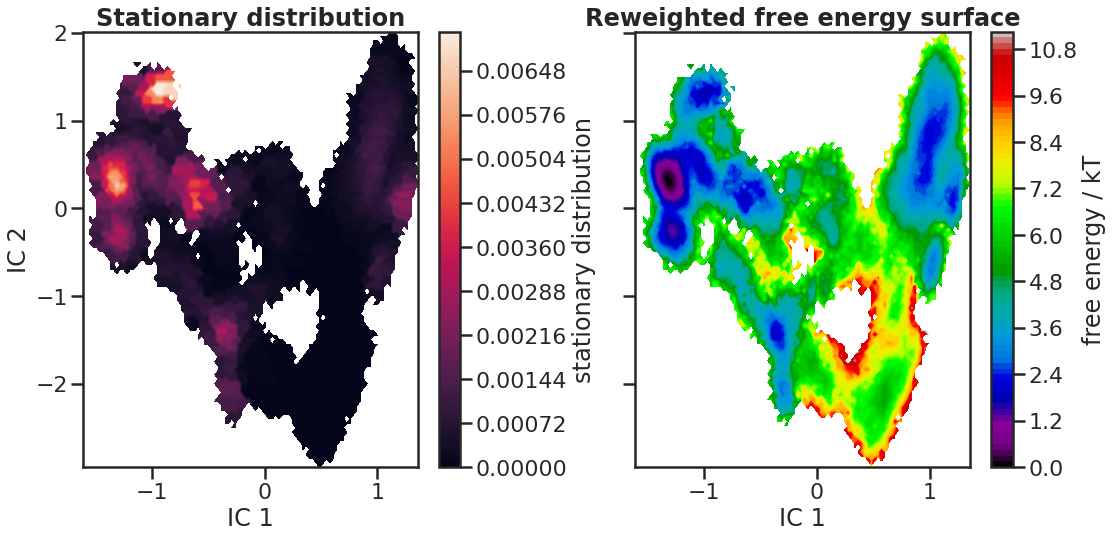

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *tica_concatenated[:, meaningful_tic[:2]].T,
    msm_obj.stationary_distribution[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *tica_concatenated[:, meaningful_tic[:2]].T,
    weights=np.concatenate(msm_obj.trajectory_weights),
    ax=axes[1],
    legacy=False)
for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()

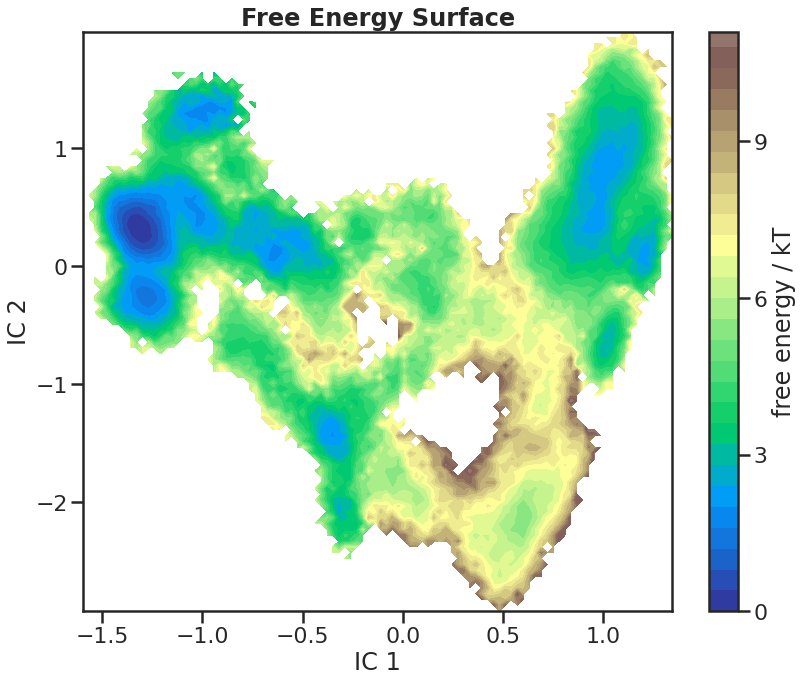

In [38]:
fig, ax = plt.subplots(figsize=(12, 10), sharex=True, sharey=True)

fe_plot = pyemma.plots.plot_free_energy(
    *tica_concatenated[:, meaningful_tic].T, ncontours=30,
    weights=np.concatenate(msm_obj.trajectory_weights),
    ax=ax, cmap='terrain', vmax=14,
    legacy=False)

ymax = 11.1
fe_plot[2]['cbar'].ax.set_ylim(0,ymax)
fe_plot[2]['cbar'].ax.set_yticks(np.arange(0,ymax,3))

ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')

ax.set_title('Free Energy Surface', fontweight='bold')
fig.tight_layout()
plt.savefig('Figures/a7_apo_20230117.png')

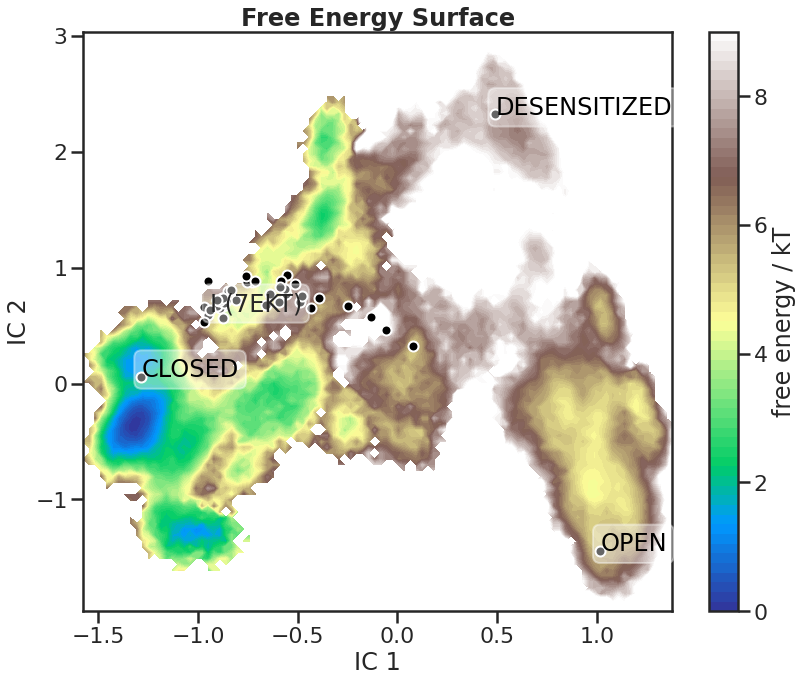

In [66]:
struc_state_dic = {
        'BGT': 'CLOSED',
        'EPJ': 'DESENSITIZED',
        '7ekt': 'I (7EKT)',
        'EPJPNU': 'OPEN',
}

fig, ax = plt.subplots(figsize=(12, 10), sharex=True, sharey=True)

fe_plot = pyemma.plots.plot_free_energy(
    *tica_concatenated[:, meaningful_tic[:2]].T,
    weights=np.concatenate(msm_obj.trajectory_weights),
    ax=ax, cmap='terrain', vmax=9,
    legacy=False)

fe_plot[2]['cbar'].ax.set_ylim(0,9)
fe_plot[2]['cbar'].ax.set_yticks([0,2,4,6,8])

ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
color='black'

#ax.scatter(tica_output_7ekt[0][0, 0], tica_output_7ekt[0][0, 1], s=200, c='Red', marker='*')
#ax.scatter(tica_output_7ekt[0][-1, 0], tica_output_7ekt[0][-1, 1], color=color, s=100, edgecolors='white')

ax.scatter(tica_output_7ekt[0][:, vis_tic[0]],
           tica_output_7ekt[0][:, vis_tic[1]],
           color=color, s=100, edgecolors='white')
ax.text(tica_output_7ekt[0][-1, 0],
        tica_output_7ekt[0][-1, 1],
        struc_state_dic['7ekt'],
        bbox=dict(boxstyle="round",
                ec=(1., 1, 1),
                fc=(1., 1, 1),
                alpha=0.4
                ))

for seed, tica_seed in enumerate(tica_output):
    if seed in start_seed_index[::2]:
#    if seed % 5 == 0:

        color='black'
        ax.scatter(tica_seed[0, vis_tic[0]], tica_seed[0, vis_tic[1]], color=color, s=100, edgecolors='white')
        ax.text(tica_seed[0, vis_tic[0]],
        tica_seed[0, vis_tic[1]],
        struc_state_dic[md_dataframe.dataframe[md_dataframe.dataframe.system==seed // 5].pathway.to_list()[0].split('_')[0]],
        color=color,
        bbox=dict(boxstyle="round",
                ec=(1., 1, 1),
                fc=(1., 1, 1),
                alpha=0.4
                )
        )
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')

ax.set_title('Free Energy Surface', fontweight='bold')
fig.tight_layout()
#plt.savefig('Figures/a7_apo_fe_msm_ca_dist_7ket.pdf',bbox_inches = 'tight', pad_inches=0.0, transparent=True)

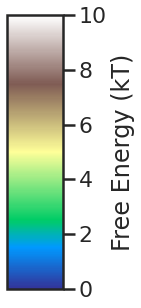

In [45]:
fig, ax = plt.subplots(figsize=(1,10))
fig.subplots_adjust(bottom=0.5)

norm = mpl.colors.Normalize(vmin=0, vmax=10)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=plt.cm.terrain,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('Free Energy (kT)')
plt.savefig('Figures/msm_cbar.png',bbox_inches = 'tight', pad_inches=0.0, transparent=True)

#### Other plots

In [ ]:
struc_state_dic = {
        'BGT': 'CLOSED',
        'EPJ': 'DESENSITIZED',
        '7ekt': 'I (7EKT)',
        'EPJPNU': 'OPEN',
}

fig, ax = plt.subplots(figsize=(12, 10), sharex=True, sharey=True)

fe_plot = pyemma.plots.plot_free_energy(
    *tica_concatenated[:, meaningful_tic].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, cmap='terrain', vmax=10,
    legacy=False)

fe_plot[2]['cbar'].ax.set_ylim(0,10)
fe_plot[2]['cbar'].ax.set_yticks([0,2,4,6,8,10])
color='black'

for seed, tica_seed in enumerate(tica_output):
    if seed in start_seed_index[::2]:
#    if seed % 5 == 0:

        color='black'
#        ax.scatter(tica_seed[0, vis_tic[0]], tica_seed[0, vis_tic[1]], color=color, s=100, edgecolors='white')
        ax.text(tica_seed[0, vis_tic[0]],
        tica_seed[0, vis_tic[1]],
        struc_state_dic[md_dataframe.dataframe[md_dataframe.dataframe.system==seed // 5].pathway.to_list()[0].split('_')[0]],
        color=color,
        bbox=dict(boxstyle="round",
                ec=(1., 1, 1),
                fc=(1., 1, 1),
                alpha=0.4
                )
        )

ax.scatter(tica_output_df[0][:, 0], tica_output_df[0][:, 1], s=5, cmap="Blues", c=range(tica_output_df[0][:, 0].shape[0]))
ax.scatter(tica_output_df[9][:, 0], tica_output_df[9][:, 1], s=5, cmap="Purples", c=range(tica_output_df[9][:, 0].shape[0]))

ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
#ax.set_title('Free Energy Surface', fontweight='bold')
fig.tight_layout()
plt.savefig('Figures/a7_fe_msm_ca_dist_dens.png',bbox_inches = 'tight', pad_inches=0.0, transparent=True)

In [ ]:
struc_state_dic = {
        'BGT': 'CLOSED',
        'EPJ': 'DESENSITIZED',
        '7ekt': 'I (7EKT)',
        'EPJPNU': 'OPEN',
}

fig, ax = plt.subplots(figsize=(12, 10), sharex=True, sharey=True)

fe_plot = pyemma.plots.plot_free_energy(
    *tica_concatenated[:, meaningful_tic].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=ax, cmap='terrain', vmax=10,
    legacy=False)

fe_plot[2]['cbar'].ax.set_ylim(0,10)
fe_plot[2]['cbar'].ax.set_yticks([0,2,4,6,8,10])
color='black'

for seed, tica_seed in enumerate(tica_output):
    if seed in start_seed_index[::2]:
#    if seed % 5 == 0:

        color='black'
#        ax.scatter(tica_seed[0, vis_tic[0]], tica_seed[0, vis_tic[1]], color=color, s=100, edgecolors='white')
        ax.text(tica_seed[0, vis_tic[0]],
        tica_seed[0, vis_tic[1]],
        struc_state_dic[md_dataframe.dataframe[md_dataframe.dataframe.system==seed // 5].pathway.to_list()[0].split('_')[0]],
        color=color,
        bbox=dict(boxstyle="round",
                ec=(1., 1, 1),
                fc=(1., 1, 1),
                alpha=0.4
                )
        )

ax.scatter(tica_output_df[0][:, 0], tica_output_df[0][:, 1], s=10, cmap="Reds", c=range(tica_output_df[0][:, 0].shape[0]))
ax.scatter(tica_output_df[9][:, 0], tica_output_df[9][:, 1], s=10, cmap="Oranges", c=range(tica_output_df[9][:, 0].shape[0]))

ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
#ax.set_title('Free Energy Surface', fontweight='bold')
fig.tight_layout()
plt.savefig('Figures/a7_fe_msm_ca_dist_dens_new.png', api=600, bbox_inches = 'tight', pad_inches=0.0, transparent=True)

In [ ]:
struc_state_dic = {
        'BGT': 'CLOSED',
        'EPJ': 'DESENSITIZED',
        '7ekt': 'I (7EKT)',
        'EPJPNU': 'OPEN',
}

fig, ax = plt.subplots(figsize=(12, 10), sharex=True, sharey=True)

fe_plot = pyemma.plots.plot_free_energy(
    *tica_concatenated[:, meaningful_tic].T,
    weights=np.concatenate(msm_obj.trajectory_weights),
    ax=ax, cmap='terrain', vmax=10,
    legacy=False)

fe_plot[2]['cbar'].ax.set_ylim(0,10)
fe_plot[2]['cbar'].ax.set_yticks([0,2,4,6,8,10])
color='black'

for seed, tica_seed in enumerate(tica_output):
    if seed in start_seed_index[::2]:
#    if seed % 5 == 0:

        color='black'
#        ax.scatter(tica_seed[0, vis_tic[0]], tica_seed[0, vis_tic[1]], color=color, s=100, edgecolors='white')
        ax.text(tica_seed[0, vis_tic[0]],
        tica_seed[0, vis_tic[1]],
        struc_state_dic[md_dataframe.dataframe[md_dataframe.dataframe.system==seed // 5].pathway.to_list()[0].split('_')[0]],
        color=color,
        bbox=dict(boxstyle="round",
                ec=(1., 1, 1),
                fc=(1., 1, 1),
                alpha=0.4
                )
        )

for output in tica_output_climber[::5]:
        ax.scatter(output[:, 0], output[:, 1], s=50)

ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
#ax.set_title('Free Energy Surface', fontweight='bold')
fig.tight_layout()
plt.savefig('Figures/a7_fe_msm_ca_dist_climber_100.png',bbox_inches = 'tight', pad_inches=0.0, transparent=True)

## CK test

In [40]:
n_states = 5

CK models building
Estimating lagtimes [ 50 100 150 200 250 300]


ITS: 100%|██████████| 6/6 [02:01<00:00, 20.30s/it] 


Start CK test


100%|██████████| 7/7 [00:09<00:00,  1.37s/it]


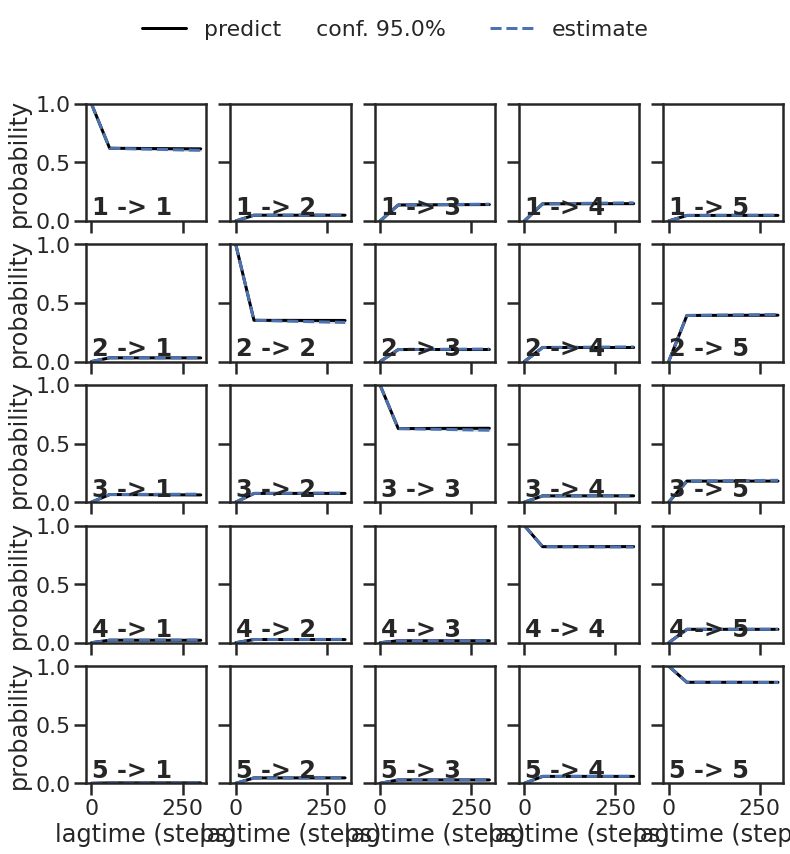

In [49]:
ck_grid = msm_obj.get_ck_test(n_states=n_states, lag=50)

In [1]:
msm_obj.pcca = msm_model.prior.pcca(n_states)

NameError: name 'msm_model' is not defined

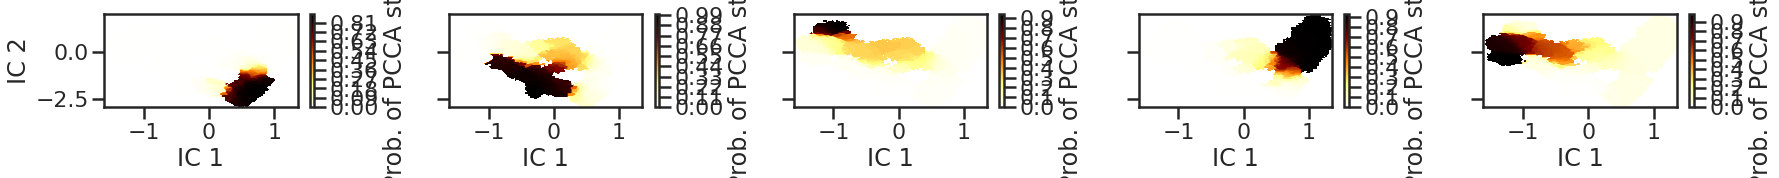

In [51]:
fig, axes = plt.subplots(1, n_states, figsize=(5*n_states, 3), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica_concatenated[:, meaningful_tic[:2]].T,
        msm_obj.pcca.memberships.T[i][dtrajs_concatenated],
        ax=ax,
        cmap='afmhot_r', 
        mask=True,
        cbar_label='Prob. of PCCA state {}'.format(i + 1))
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
fig.tight_layout()

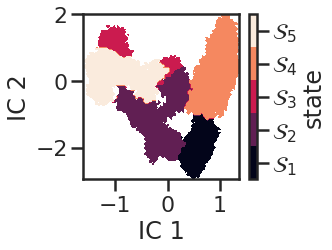

In [52]:
metastable_traj = [msm_obj.pcca.assignments[c_traj] for c_traj in cluster_dtrajs]
metastable_concat = np.concatenate(metastable_traj)

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, meaningful_tic[:2]].T,
    metastable_concat, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(n_states)])
fig.tight_layout()

In [46]:
state_labels= dict(zip(range(n_states), ['D', 'I2', 'I1', 'O', 'C']))

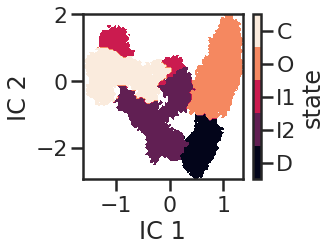

In [47]:
metastable_traj = [msm_obj.pcca.assignments[c_traj] for c_traj in cluster_dtrajs]
metastable_concat = np.concatenate(metastable_traj)

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, meaningful_tic[:2]].T,
    metastable_concat, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([state_labels[i]
                             for i in range(n_states)])
fig.tight_layout()

In [48]:
print('label\tstate\tπ\t\tG/kT')
for i, s in enumerate(msm_obj.pcca.sets):
    p = msm_obj.stationary_distribution[s].sum()
    print('{}\t{}\t{:f}\t{:f}'.format(state_labels[i], i + 1, p, -np.log(p)))

label	state	π		G/kT
D	1	0.003850	5.559556
I2	2	0.094474	2.359428
I1	3	0.081932	2.501865
O	4	0.214361	1.540095
C	5	0.605383	0.501895


In [ ]:
from itertools import product

mfpt = np.zeros((n_states, n_states))
mfpt_std = np.zeros((n_states, n_states))

for i, j in product(range(n_states), repeat=2):
    stats_mfpt = msm_model.gather_stats("mfpt",
                                        A=msm_obj.pcca.sets[i],
                                        B=msm_obj.pcca.sets[j])
    mfpt[i, j] = stats_mfpt.mean * msm_obj.dt

    mfpt_std[i, j] = stats_mfpt.std * msm_obj.dt

In [ ]:
print('MFPT / us:')
DataFrame(np.round(mfpt / 1000, decimals=2),
            index=[state_labels[i] + ' to'
                             for i in range(n_states)],
            columns=[state_labels[i]
                             for i in range(n_states)])

In [ ]:
print('MFPT STD / us:')

DataFrame(np.round(mfpt_std / 1000, decimals=2),
            index=[state_labels[i] + ' to'
                             for i in range(n_states)],
            columns=[state_labels[i]
                             for i in range(n_states)])

In [ ]:
stat_1 = 4
stat_2 = 3
fig, axes = plt.subplots(1,2,figsize=(15, 7))

commitor = msm_model.prior.committor_forward(msm_obj.pcca.sets[stat_1],
                                             msm_obj.pcca.sets[stat_2])
pyemma.plots.plot_contour(*tica_concatenated[:, meaningful_tic].T,
                          commitor[dtrajs_concatenated],
                          ax=axes[0],
                          mask=True,
                          cmap='plasma')
axes[0].set_xlabel('TIC 1')
axes[0].set_ylabel('TIC 2')
axes[0].set_title(f'Committor from {state_labels[stat_1]} to {state_labels[stat_2]}', fontweight='bold')

commitor = msm_model.prior.committor_forward(msm_obj.pcca.sets[stat_2],
                                             msm_obj.pcca.sets[stat_1])
pyemma.plots.plot_contour(*tica_concatenated[:, meaningful_tic].T,
                                commitor[dtrajs_concatenated],
                                ax=axes[1],
                                mask=True,
                                cmap='plasma',
                                )
axes[1].set_xlabel('TIC 1')
axes[1].set_ylabel('TIC 2')
axes[1].set_title(f'Committor from {state_labels[stat_2]} to {state_labels[stat_1]}', fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
stat_1 = 0
stat_2 = 4
fig, axes = plt.subplots(1,2,figsize=(15, 7))

commitor = msm_model.prior.committor_forward(msm_obj.pcca.sets[stat_1],
                                             msm_obj.pcca.sets[stat_2])
pyemma.plots.plot_contour(*tica_concatenated[:, meaningful_tic].T,
                          commitor[dtrajs_concatenated],
                          ax=axes[0],
                          mask=True,
                          cmap='plasma')
axes[0].set_xlabel('TIC 1')
axes[0].set_ylabel('TIC 2')
axes[0].set_title(f'Committor from {state_labels[stat_1]} to {state_labels[stat_2]}', fontweight='bold')

commitor = msm_model.prior.committor_forward(msm_obj.pcca.sets[stat_2],
                                             msm_obj.pcca.sets[stat_1])
pyemma.plots.plot_contour(*tica_concatenated[:, meaningful_tic].T,
                                commitor[dtrajs_concatenated],
                                ax=axes[1],
                                mask=True,
                                cmap='plasma',
                                )
axes[1].set_xlabel('TIC 1')
axes[1].set_ylabel('TIC 2')
axes[1].set_title(f'Committor from {state_labels[stat_2]} to {state_labels[stat_1]}', fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
stat_1 = 0
stat_2 = 3
fig, axes = plt.subplots(1,2,figsize=(15, 7))

commitor = msm_model.prior.committor_forward(msm_obj.pcca.sets[stat_1],
                                             msm_obj.pcca.sets[stat_2])
pyemma.plots.plot_contour(*tica_concatenated[:, meaningful_tic].T,
                          commitor[dtrajs_concatenated],
                          ax=axes[0],
                          mask=True,
                          cmap='plasma')
axes[0].set_xlabel('TIC 1')
axes[0].set_ylabel('TIC 2')
axes[0].set_title(f'Committor from {state_labels[stat_1]} to {state_labels[stat_2]}', fontweight='bold')

commitor = msm_model.prior.committor_forward(msm_obj.pcca.sets[stat_2],
                                             msm_obj.pcca.sets[stat_1])
pyemma.plots.plot_contour(*tica_concatenated[:, meaningful_tic].T,
                                commitor[dtrajs_concatenated],
                                ax=axes[1],
                                mask=True,
                                cmap='plasma',
                                )
axes[1].set_xlabel('TIC 1')
axes[1].set_ylabel('TIC 2')
axes[1].set_title(f'Committor from {state_labels[stat_2]} to {state_labels[stat_1]}', fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
inverse_mfpt = np.zeros_like(mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]

In [ ]:
highest_membership = msm_obj.pcca.metastable_distributions.argmax(1)
coarse_state_centers = cluster_centers[highest_membership]

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, meaningful_tic[:2]].T,
    metastable_concat,
    ax=ax, zorder=-1, cmap='Pastel2')

misc['cbar'].set_ticklabels(range(1, n_states + 1))

pyemma.plots.plot_network(
    inverse_mfpt,
    pos=coarse_state_centers,
    figpadding=0,
    arrow_label_format='%.0f us',
    arrow_labels= mfpt / 1000,
    size=16,
    show_frame=True,
    state_labels=[state_labels[i] for i in range(n_states)],
    ax=ax)
ax.set_xlim(-2,2)
ax.set_ylim(-3,3)
fig.tight_layout()
#plt.savefig('Figures/a7_fe_msm_kinetic.png')

# Show correlation

In [26]:
if True:    
    test_feature_TIC_correlation_df = msm_obj.get_correlation('ca_distance_10A_2diff_reciprocal')

100%|██████████| 3920/3920 [01:48<00:00, 35.96it/s]


In [28]:
for row in test_feature_TIC_correlation_df.itertuples():
    for resid in resids_exclusion:
        if resid == eval(row.Index[33:].split('_')[1]) or resid == eval(row.Index[33:].split('_')[3]):
            # remove the row
            test_feature_TIC_correlation_df.drop(row.Index, inplace=True)
            break

In [29]:
test_feature_TIC_correlation_df['singular_vec_left_eig_0'] = tica_model_tica.singular_vectors_left.T[0] * tica_model_tica.mean_0.T
test_feature_TIC_correlation_df['singular_vec_left_eig_1'] = tica_model_tica.singular_vectors_left.T[1] * tica_model_tica.mean_0.T
test_feature_TIC_correlation_df['singular_vec_left_eig_2'] = tica_model_tica.singular_vectors_left.T[2] * tica_model_tica.mean_0.T

In [132]:
#test_feature_TIC_correlation_df = test_feature_TIC_correlation_df.reindex(test_feature_TIC_correlation_df.TIC2.abs().sort_values().index)[::-1]
test_feature_TIC_correlation_df = test_feature_TIC_correlation_df.reindex(test_feature_TIC_correlation_df.singular_vec_left_eig_1.abs().sort_values().index)[::-1]

feat_index = test_feature_TIC_correlation_df.index.to_list()

In [380]:
feat_all = md_dataframe.get_feature([
                                    'ca_distance_10A_2diff_reciprocal'
                                    ],
                        extra_metadata=['seed', 'pathway', 'ensemble'])

# recipropcal to distance
#feat_all.iloc[:, 7:] = feat_all.iloc[:, 7:].apply(lambda x: 1 / x)

Loading features: 100%|██████████| 1/1 [00:16<00:00, 16.26s/it]


In [381]:
from msm_a7_nachrs.util.dataloader import MultimerTrajectoriesDataset, get_symmetrized_data

mapped_feature_trajectories = []
all_feature_trajectories = []
feature_df = md_dataframe.get_feature(msm_obj.feature_input_list,
            in_memory=False)
for system, row in tqdm(feature_df.iterrows(), total=feature_df.shape[0]):
    feature_trajectory = []
    for feat_loc, indice, feat_type in zip(row[msm_obj.feature_input_list].values,
                                            msm_obj.feature_input_indice_list,
                                            msm_obj.feature_type_list):
        raw_data = np.load(feat_loc, allow_pickle=True)
        raw_data = raw_data.reshape(raw_data.shape[0], -1)[:, indice]
        if feat_type == 'global':
            # repeat five times
            raw_data = np.repeat(raw_data, 5, axis=1).reshape(raw_data.shape[0], -1, 5).transpose(0, 2, 1)
        else:
            raw_data = raw_data.reshape(raw_data.shape[0], 5, -1)

        feature_trajectory.append(raw_data)

    feature_trajectory = np.concatenate(feature_trajectory, axis=2).reshape(raw_data.shape[0], -1)
    feature_trajectories = get_symmetrized_data([feature_trajectory], msm_obj.multimer)
    for single_traj in feature_trajectories:
        all_feature_trajectories.append(single_traj)
        mapped_feature_trajectories.append(msm_obj.tica.transform(single_traj))

100%|██████████| 195/195 [00:21<00:00,  9.19it/s]


In [382]:
sim_feats = all_feature_trajectories[97*5]

In [383]:
feat_diff_sort = np.abs(sim_feats[0] - sim_feats[10]).argsort()[::-1]

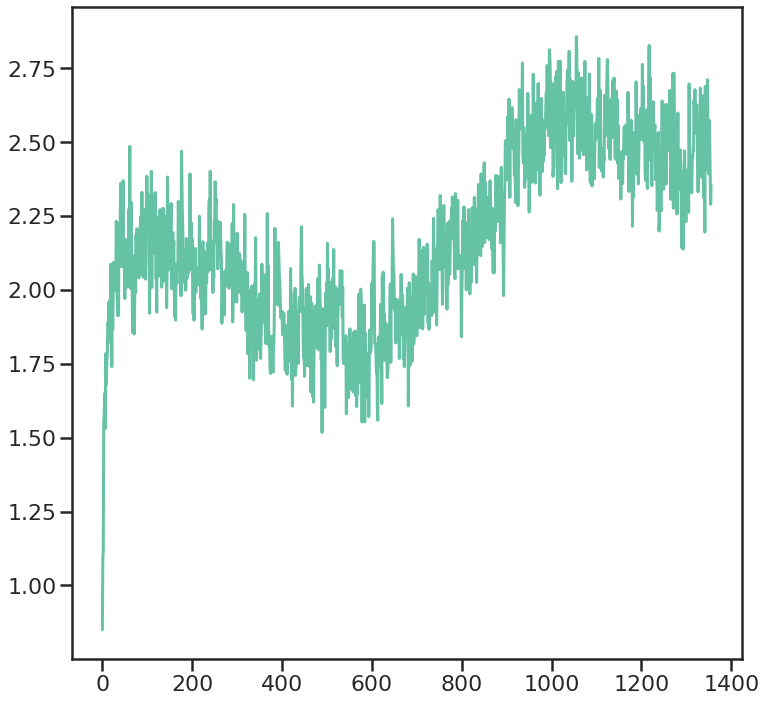

In [384]:
plt.plot(tica_model_tica.instantaneous_obs(all_feature_trajectories[97*5]).T[1])

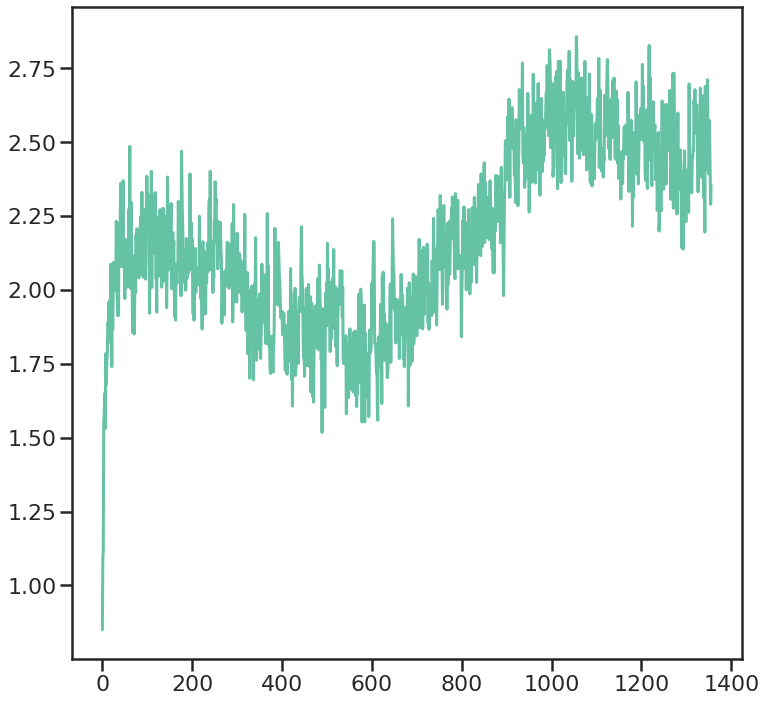

In [396]:
plt.plot(np.dot(tica_model_tica.instantaneous_coefficients.T,
                all_feature_trajectories[97*5].T - tica_model_tica.mean_0.T.reshape(-1, 1))[1])

In [465]:
feat_info[feat_ind_inclusin][]

array(['A_25_A_154', 'A_26_A_154', 'A_35_E_189', ..., 'E_262_A_172',
       'E_262_A_205', 'E_266_A_208'], dtype='<U11')

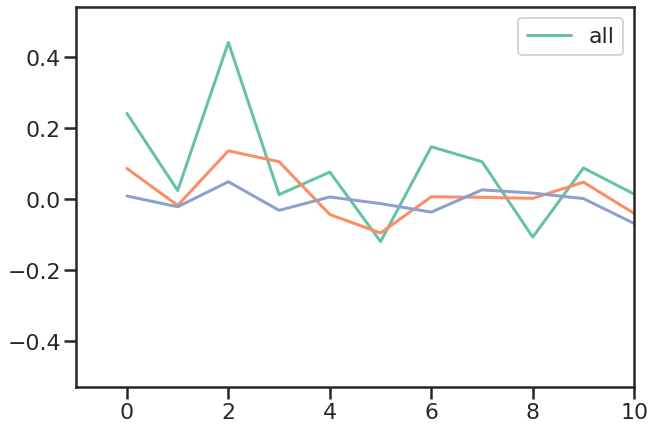

In [494]:
fig, ax = plt.subplots(figsize=(10, 7))

def get_frame_diff(indices):
    feat_indices = np.arange(0,1610)[indices]
    return np.ediff1d(np.dot(tica_model_tica.instantaneous_coefficients[feat_indices].T,
                    all_feature_trajectories[97*5].T[feat_indices])[1])

ax.plot(np.ediff1d(np.dot(tica_model_tica.instantaneous_coefficients.T,
                all_feature_trajectories[97*5].T)[1]), label='all')

#ax.plot(get_frame_diff(np.arange(0,319)))
#ax.plot(get_frame_diff(np.arange(319, 638)))
ax.plot(get_frame_diff(np.arange(638, 957)))
#ax.plot(get_frame_diff(np.arange(957, 1276)))
#ax.plot(get_frame_diff(np.arange(1276, 1595)))

ax.plot(get_frame_diff(np.arange(800, 830)))



ax.set_xlim(-1,10)
#ax.set_ylim(-2, 2)
ax.legend()

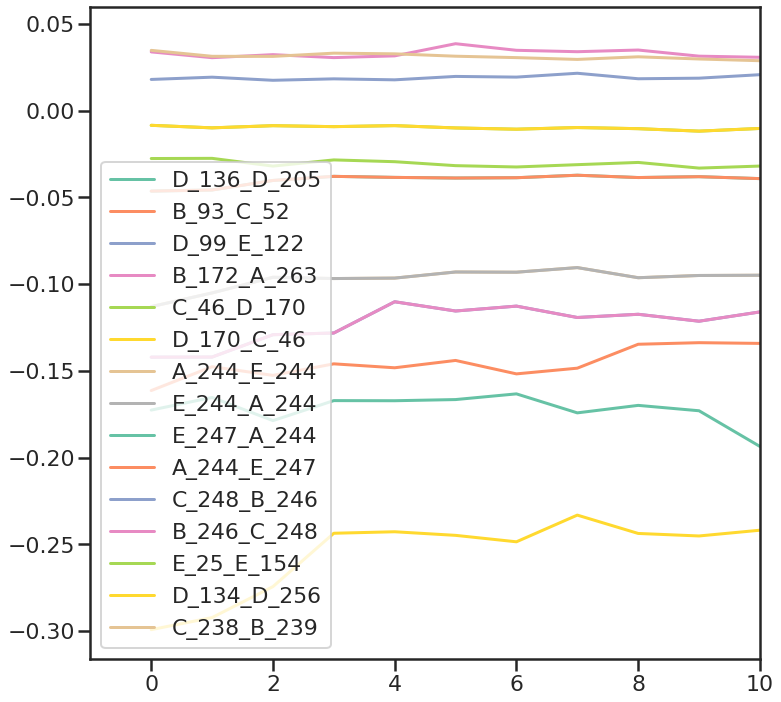

In [356]:
sns.set_palette('Set2')

for feat in feat_diff_sort[4:215]:
    plt.plot(np.dot(tica_model_tica.instantaneous_coefficients.T[:, [feat]],
                    all_feature_trajectories[97*5].T[[feat],:])[1],
                    label=feat_info[feat_ind_inclusin][feat])
                    
if False:
    plt.plot(all_feature_trajectories[97*5][0, feat_diff_sort[210:218]], label='0')
    plt.plot(all_feature_trajectories[97*5][1, feat_diff_sort[210:218]], label='1')
    plt.plot(all_feature_trajectories[97*5][10, feat_diff_sort[210:218]], label='10')
    plt.plot(all_feature_trajectories[97*5][30, feat_diff_sort[210:218]], label='30')

plt.xlim(-1,10)
plt.legend()

(0.0, 10.0)

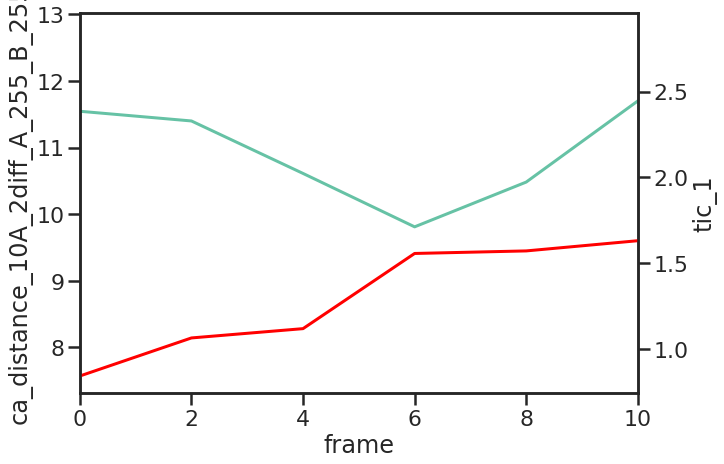

In [137]:
test_df = feat_all.query('system == 97')
fig, ax = plt.subplots(figsize=(10, 7))
for feat in feat_index[:5:5]:
    sns.lineplot(data=test_df,
                x='frame',
                y=feat.replace('_reciprocal', ''),
                ax=ax)

ax_twin = ax.twinx()
test_tica_df = tica_dataframe.query('system == 97')
sns.lineplot(data=test_tica_df,
                x='frame',
                y='tic_1',
                ax=ax_twin,
                color='red')

ax.set_xlim(0,10)

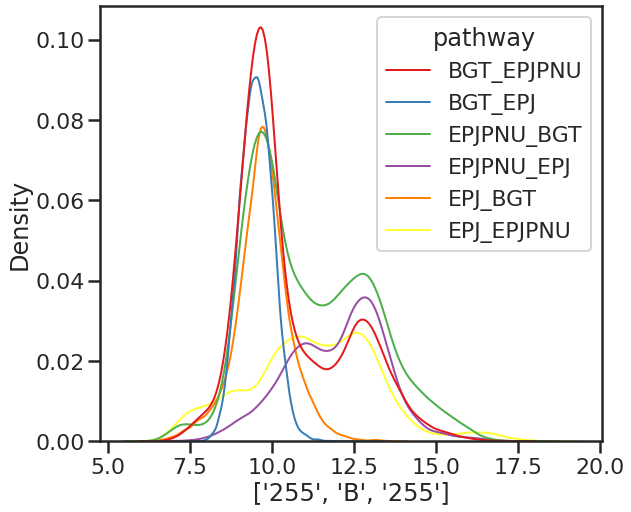

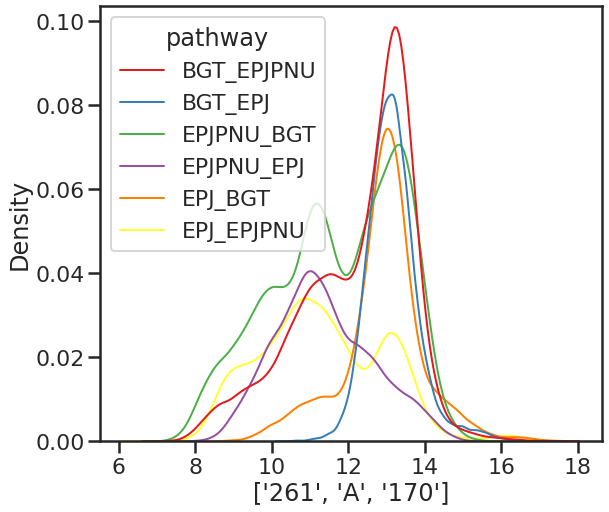

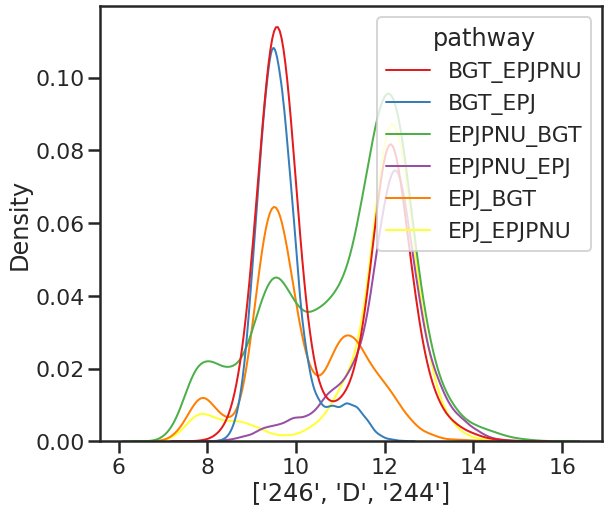

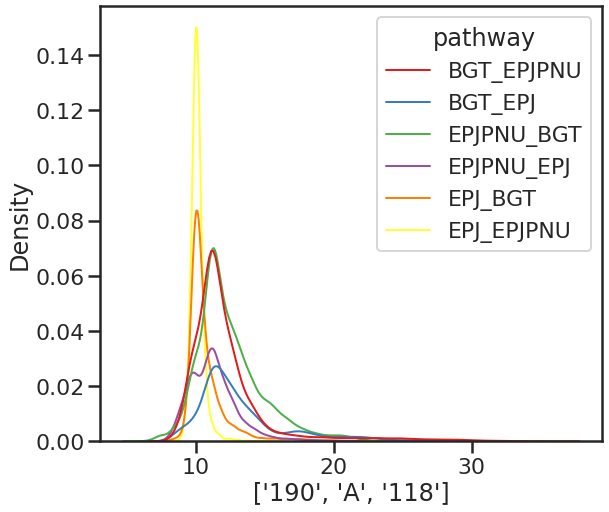

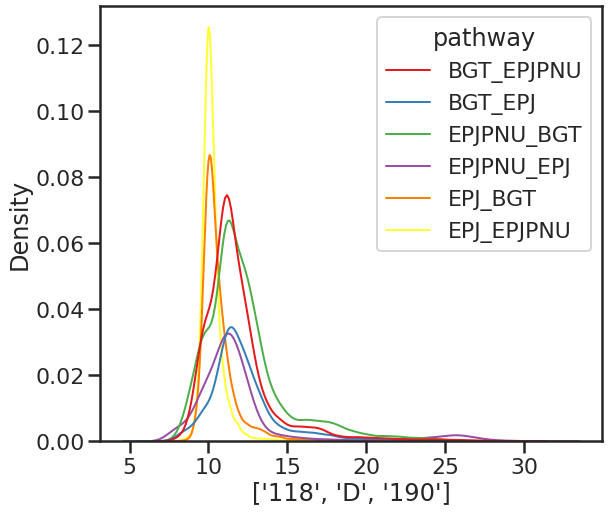

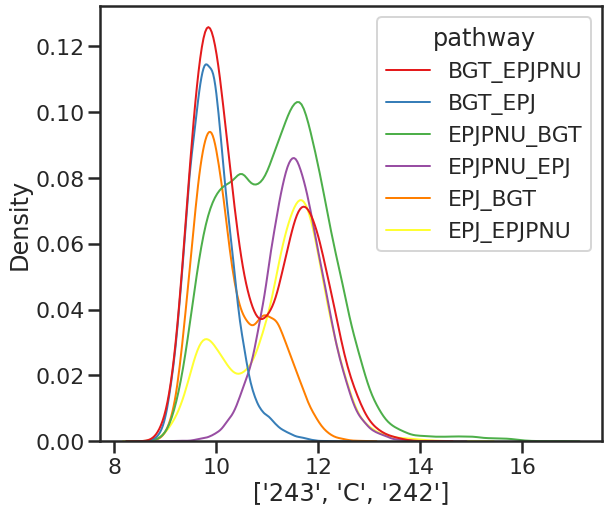

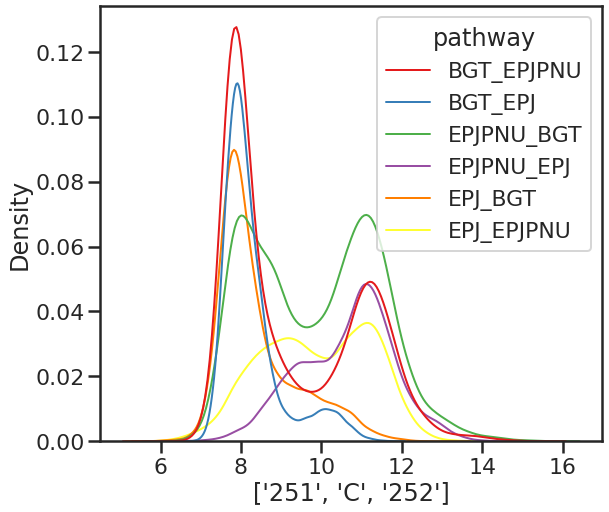

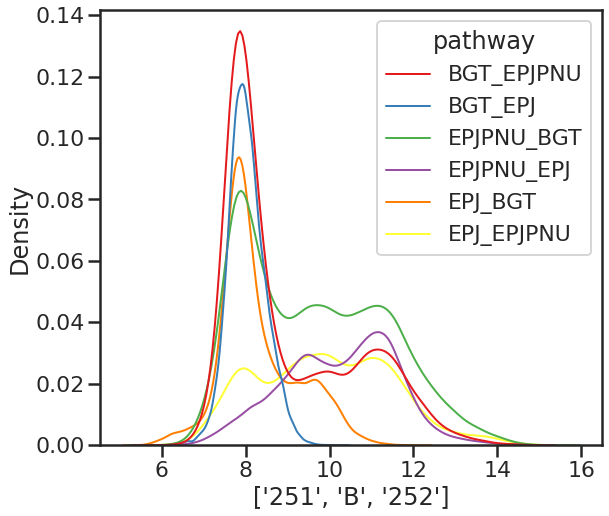

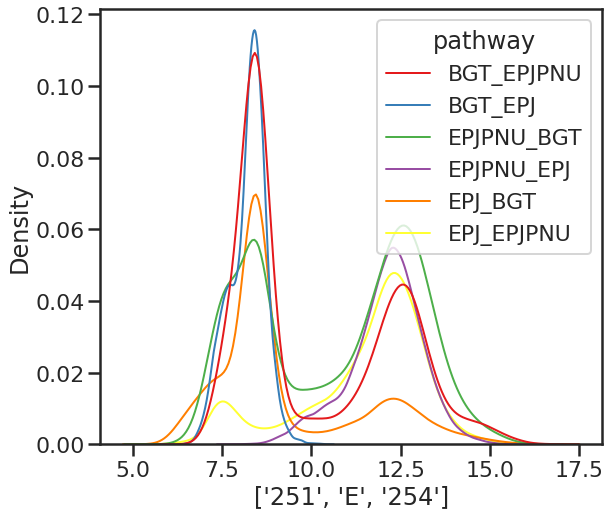

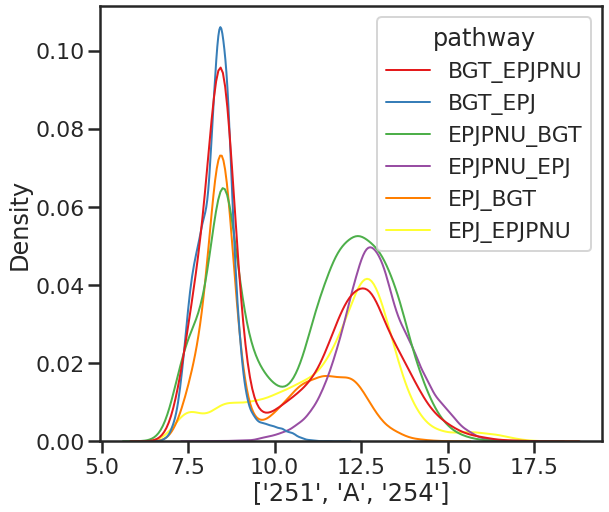

In [39]:
for feat in feat_index[:50:5]:
    feat = feat.replace('_reciprocal', '')
    fig, ax = plt.subplots(1, 1, figsize=(9, 8))
    ax = sns.kdeplot(data=feat_all, hue='pathway',
                x=feat, ax=ax, linewidth=2, legend=True, palette='Set1')
#    ax.legend(labels=feat_all.name.unique(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    x_lab = ax.get_xlabel()
    ax.set_xlabel(x_lab.split('_')[5:])
#    ax.set_title(test_feature_TIC_correlation_df.T[feat].to_string().split('/n')[0])
    plt.show()

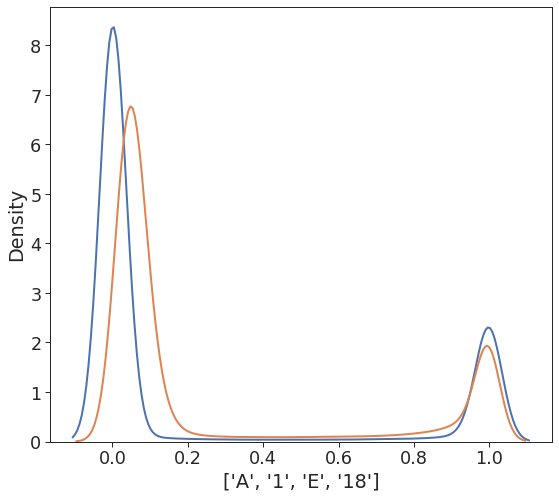

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(9, 8))
feat = 'ca_distance_10A_2diff_logminmax5_A_1_E_18'
sns.kdeplot(data=feat_all,
            x=feat, ax=ax, linewidth=2, legend=True, palette='Set1')
feat = 'ca_distance_10A_2diff_logminmax2_A_1_E_18'
sns.kdeplot(data=feat_all,
            x=feat, ax=ax, linewidth=2, legend=True, palette='Set1')
#    ax.legend(labels=feat_all.name.unique(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

x_lab = ax.get_xlabel()
ax.set_xlabel(x_lab.split('_')[5:])
#ax.set_title(test_feature_TIC_correlation_df.T[feat].to_string().split('/n')[0])
plt.show()

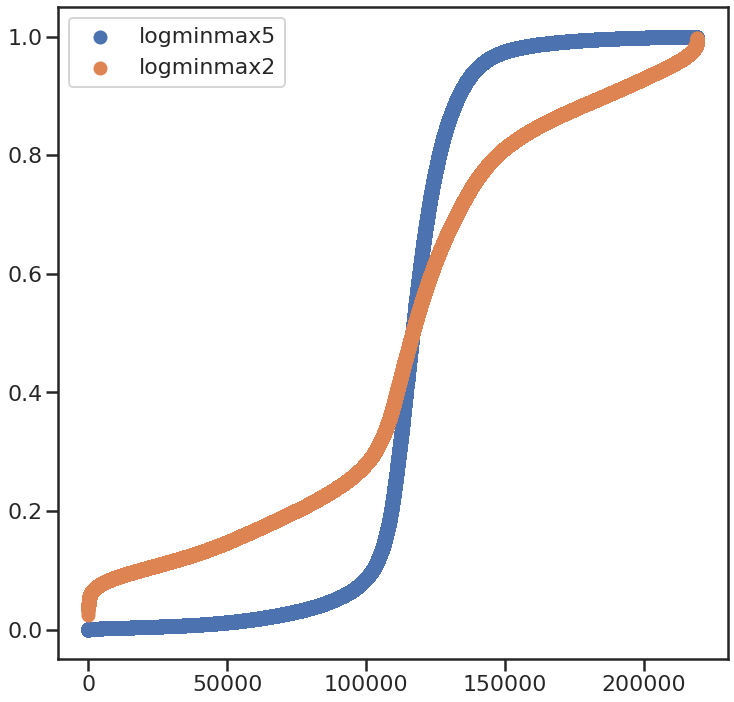

In [86]:
feat = 'ca_distance_10A_2diff_logminmax5_D_270_I_390'

plt.scatter(np.arange(feat_all[feat].shape[0]), feat_all[feat].sort_values(),
            label='logminmax5')

feat = 'ca_distance_10A_2diff_logminmax2_D_270_I_390'

plt.scatter(np.arange(feat_all[feat].shape[0]), feat_all[feat].sort_values(),
            label='logminmax2')
plt.legend()

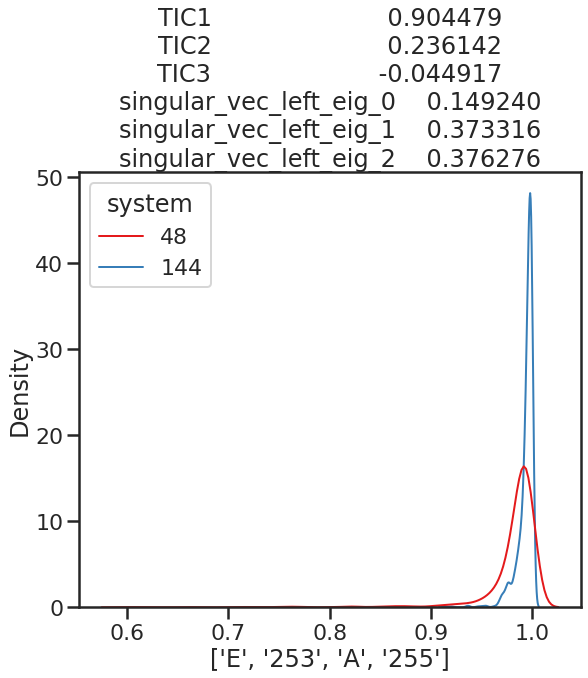

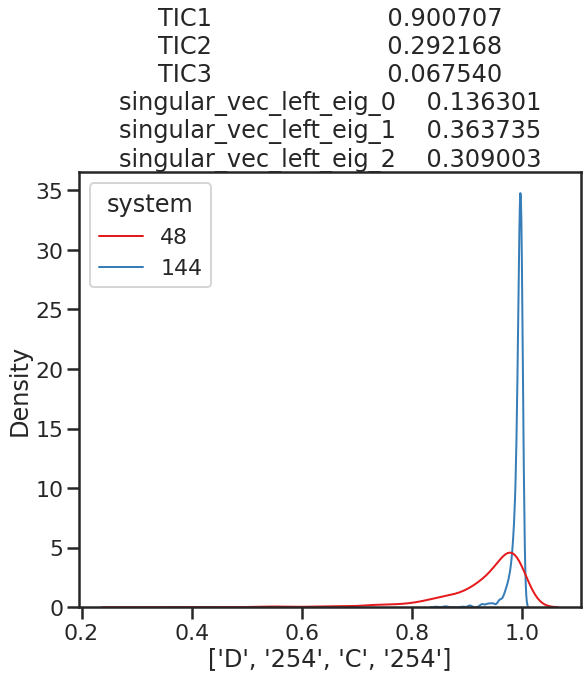

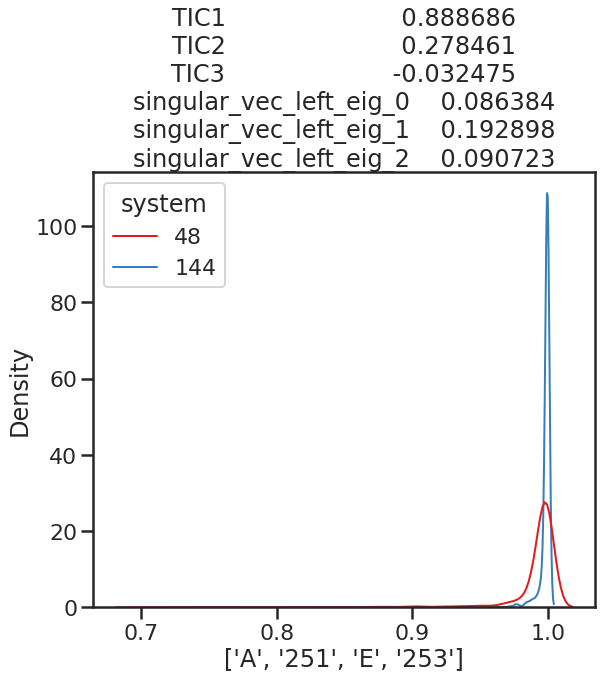

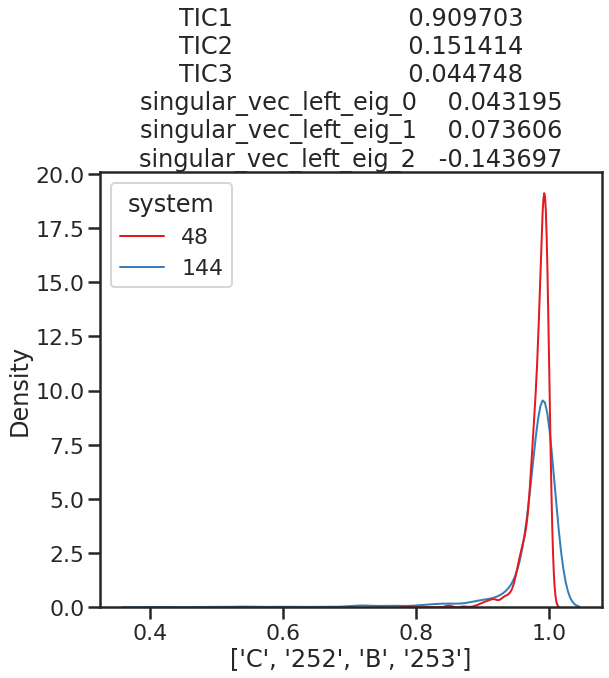

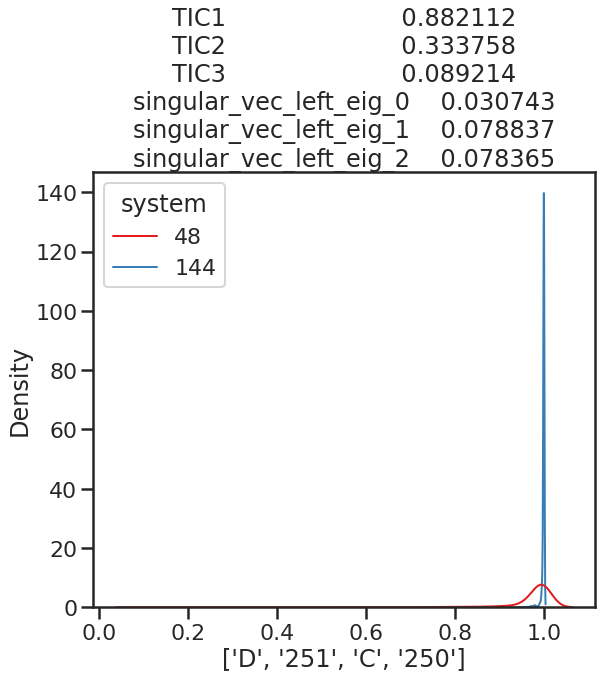

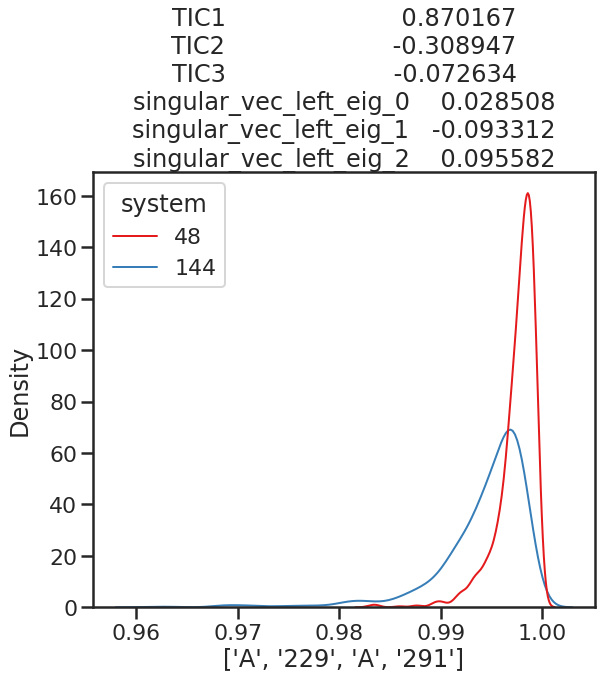

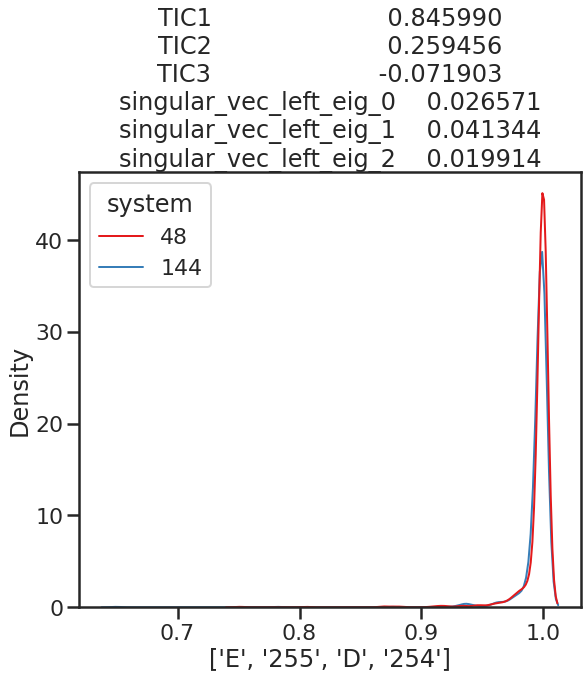

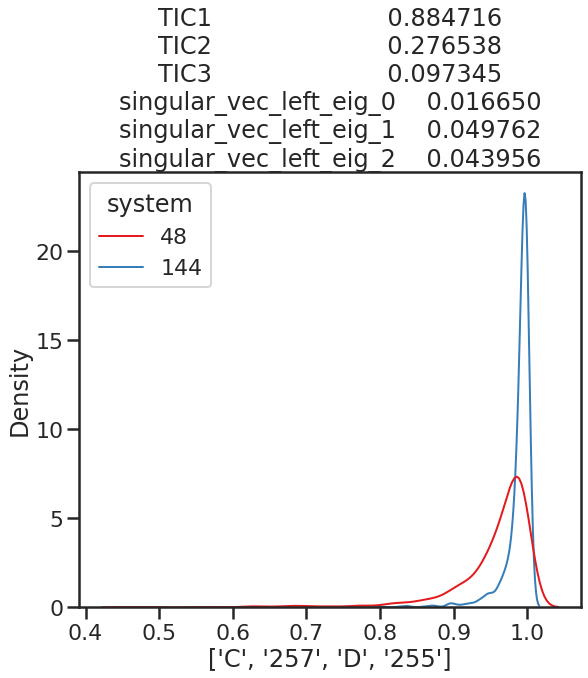

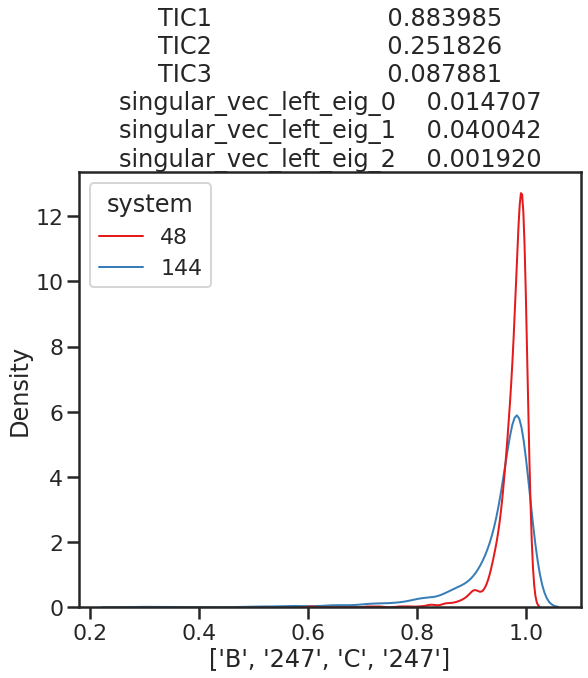

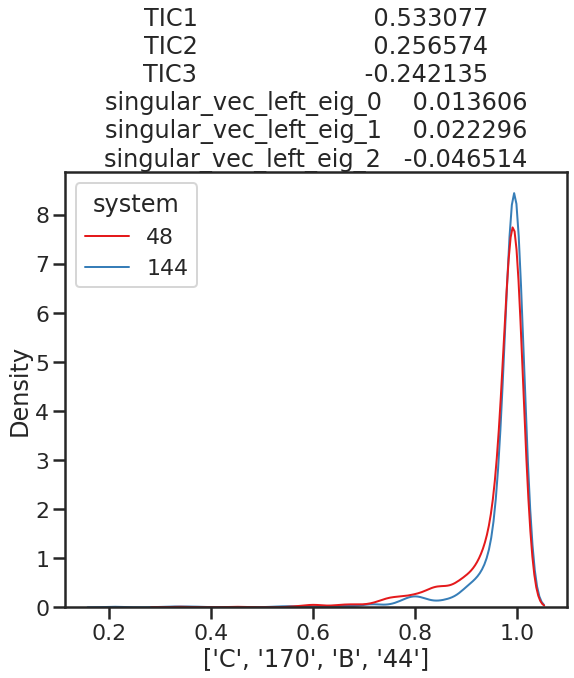

In [87]:
for feat in feat_index[:50:5]:
    fig, ax = plt.subplots(1, 1, figsize=(9, 8))
    ax = sns.kdeplot(data=feat_all.query('system in [48, 144]'),
                x=feat, ax=ax, hue='system', linewidth=2, legend=True, palette='Set1')
#    ax.legend(labels=feat_all.name.unique(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    x_lab = ax.get_xlabel()
    ax.set_xlabel(x_lab.split('_')[5:])
    ax.set_title(test_feature_TIC_correlation_df.T[feat].to_string().split('/n')[0])
    plt.show()

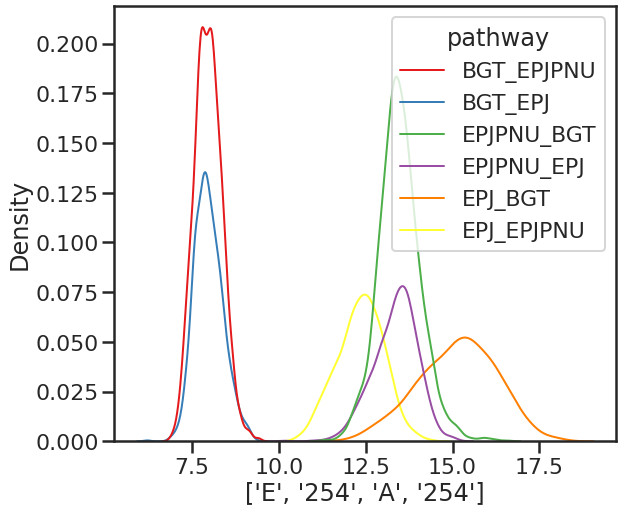

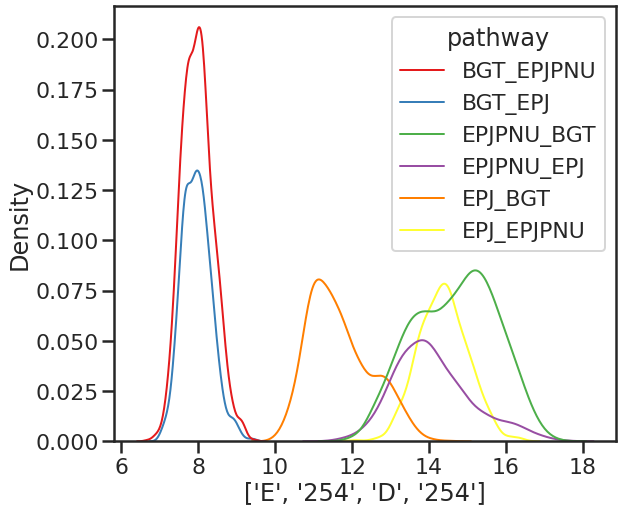

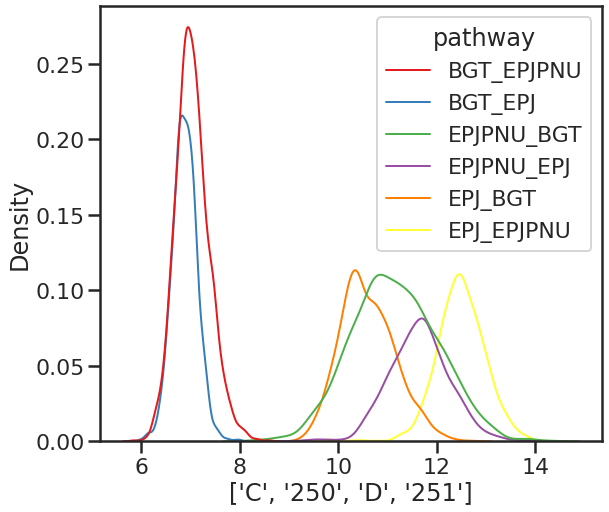

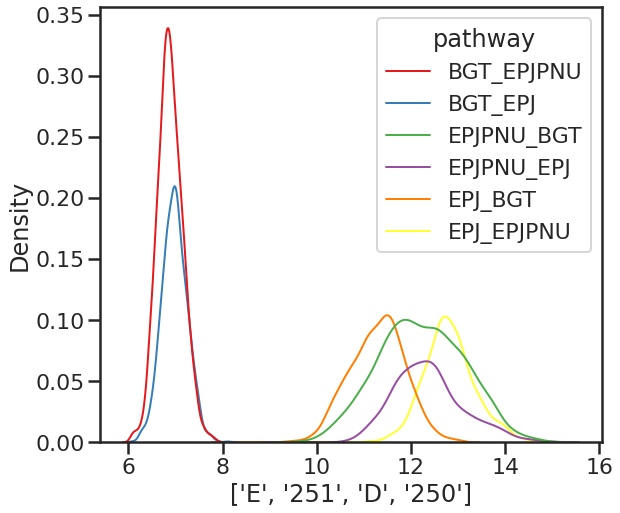

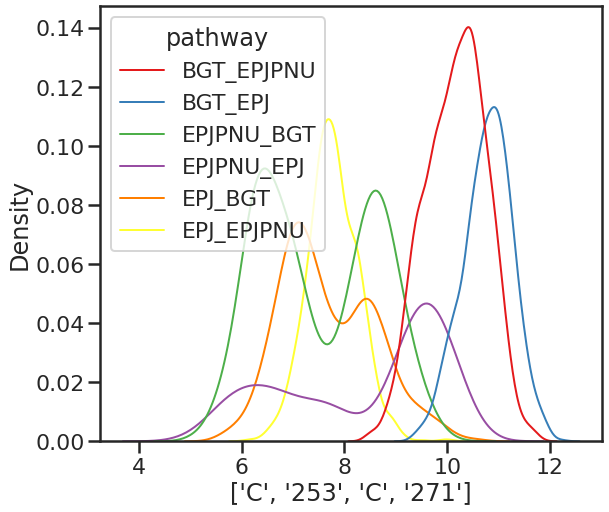

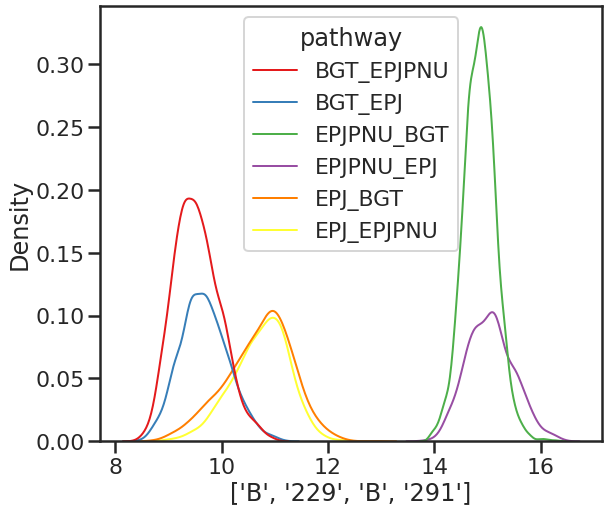

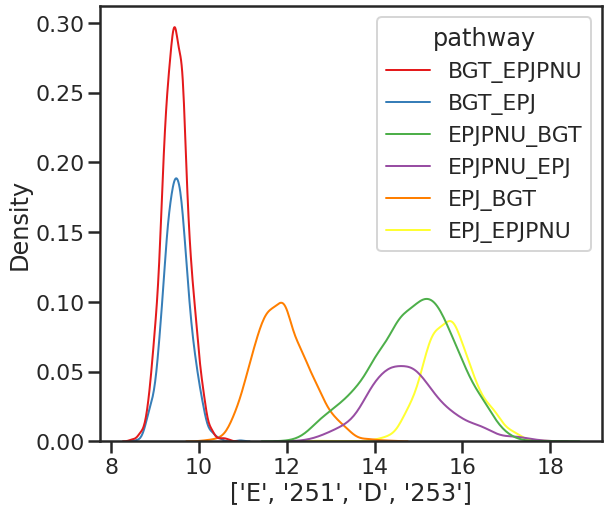

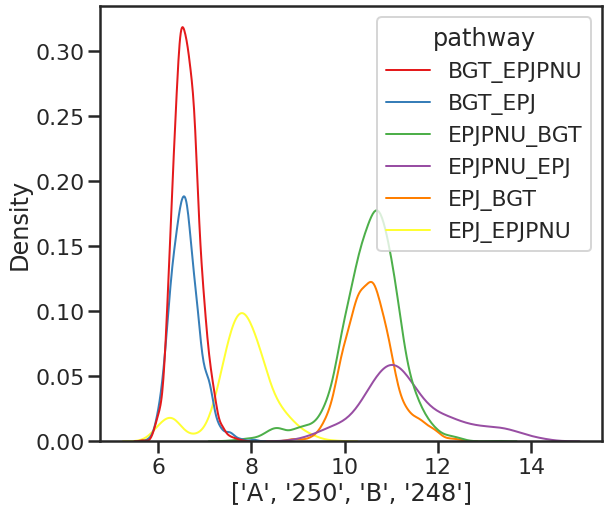

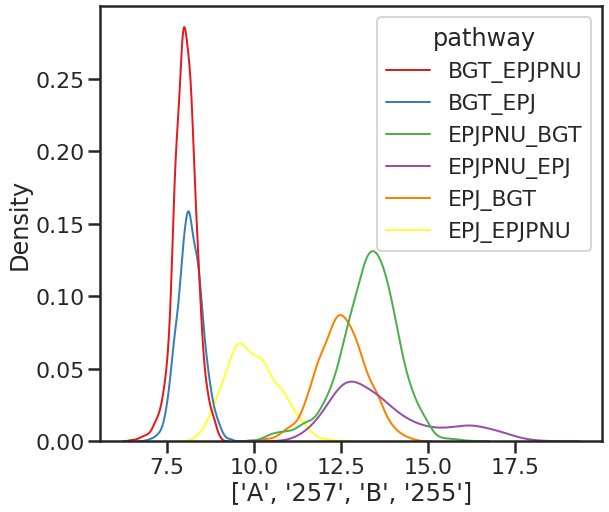

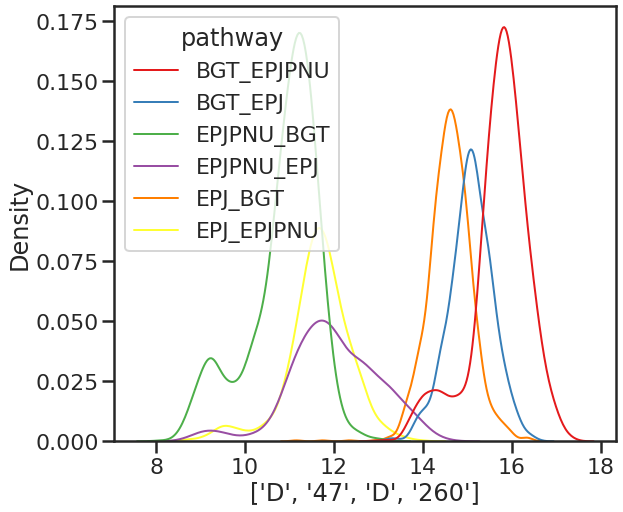

In [108]:
for feat in feat_index[:50:5]:
    feat = feat.replace('logminmax5_', '')
    fig, ax = plt.subplots(1, 1, figsize=(9, 8))
    ax = sns.kdeplot(data=feat_all.query('seed == 0'),
                x=feat, ax=ax, hue='pathway', linewidth=2, legend=True, palette='Set1')
#    ax.legend(labels=feat_all.name.unique(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    x_lab = ax.get_xlabel()
    ax.set_xlabel(x_lab.split('_')[4:])
#    ax.set_title(test_feature_TIC_correlation_df.T[feat].to_string().split('/n')[0])
    plt.show()

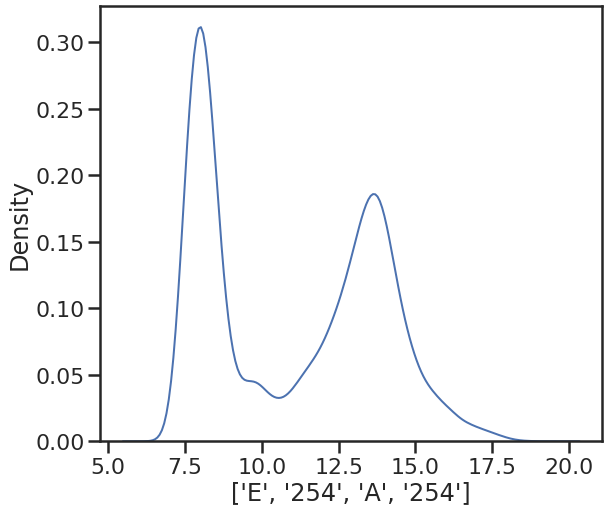

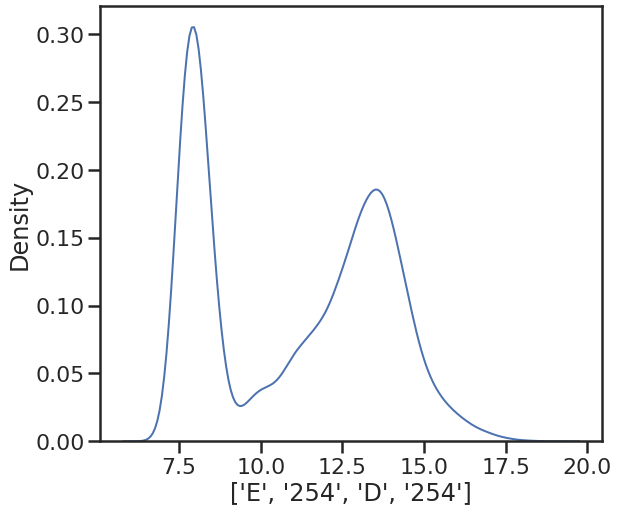

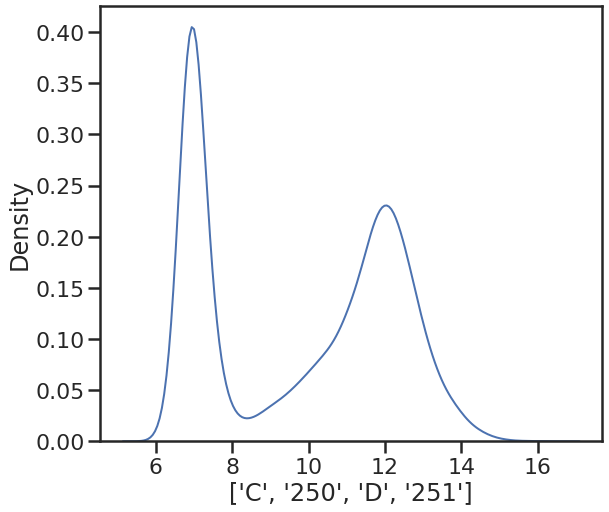

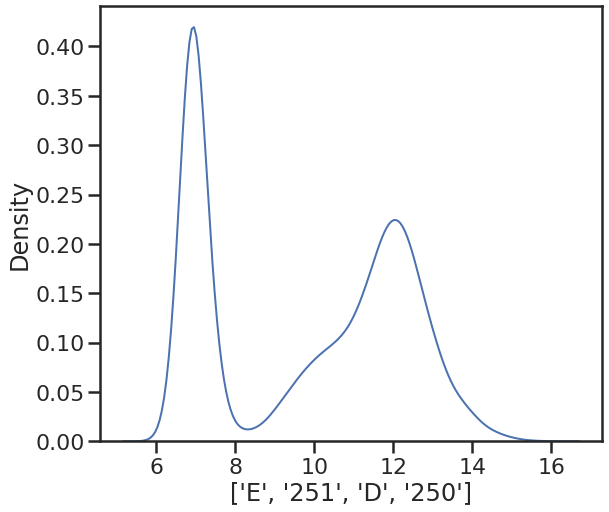

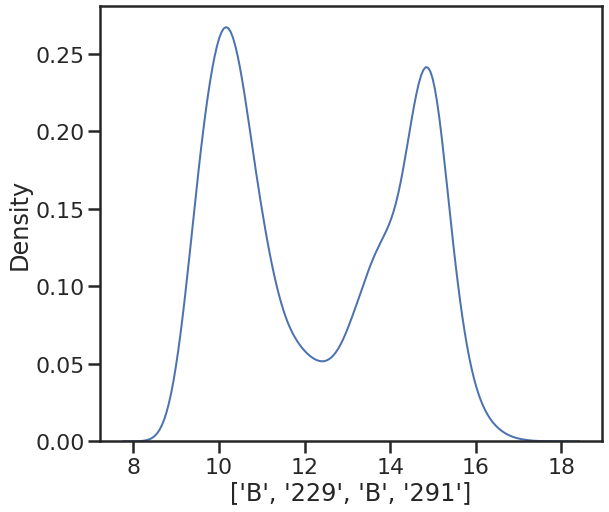

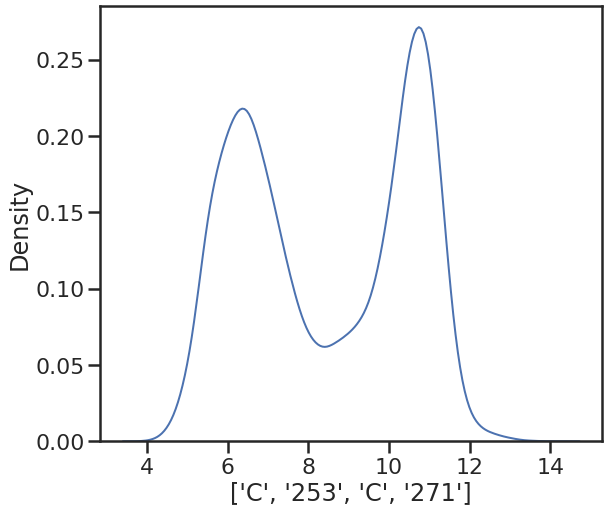

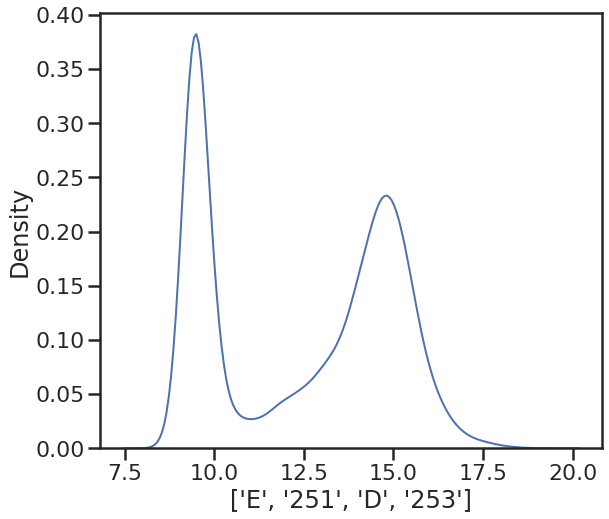

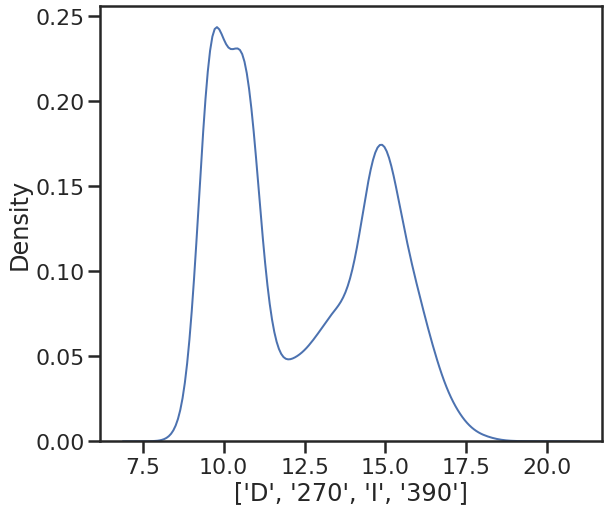

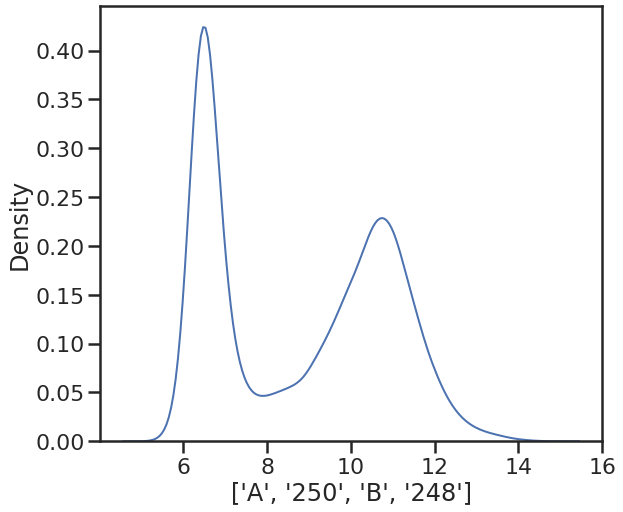

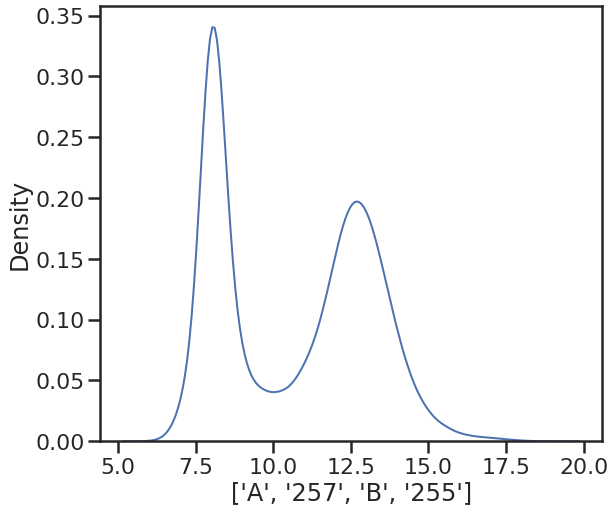

In [74]:
for feat in feat_index[:50:5]:
    feat = feat.replace('logminmax5_', '')
    fig, ax = plt.subplots(1, 1, figsize=(9, 8))
    ax = sns.kdeplot(data=feat_all,
                x=feat, ax=ax, linewidth=2, legend=True, palette='Set1')
#    ax.legend(labels=feat_all.name.unique(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    x_lab = ax.get_xlabel()
    ax.set_xlabel(x_lab.split('_')[4:])
#    ax.set_title(test_feature_TIC_correlation_df.T[feat].to_string().split('/n')[0])
    plt.show()

In [ ]:
fe

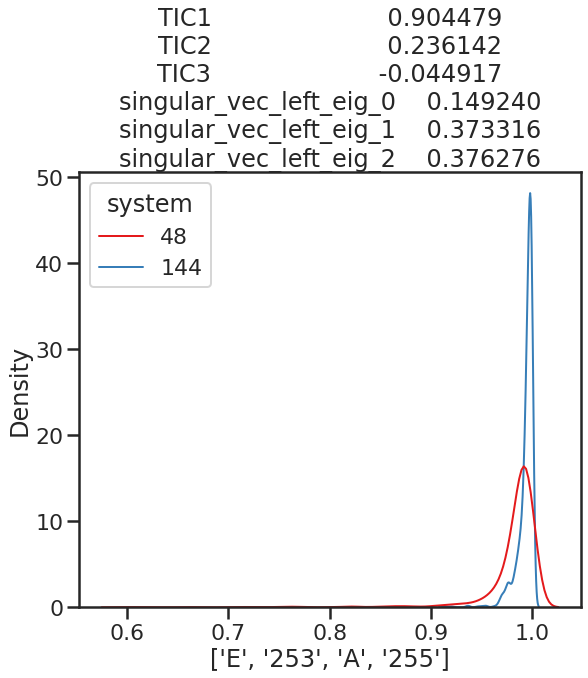

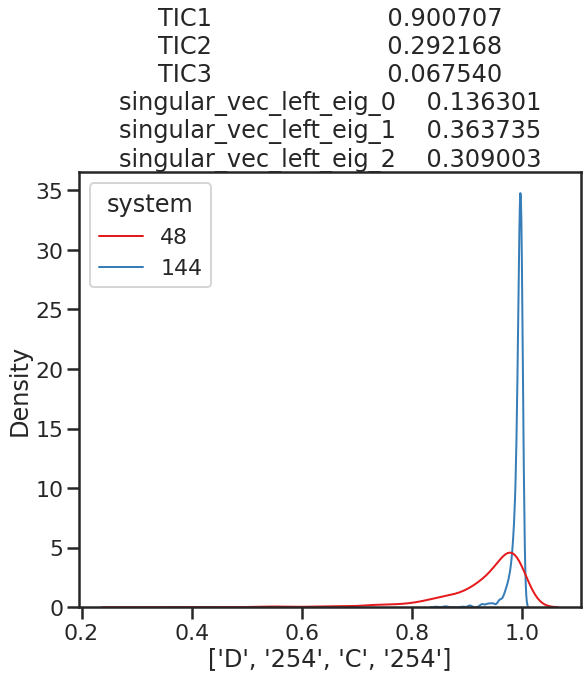

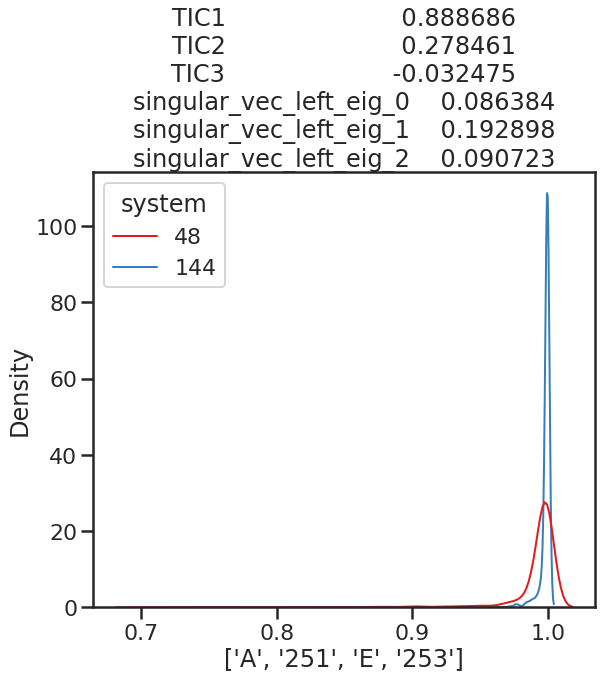

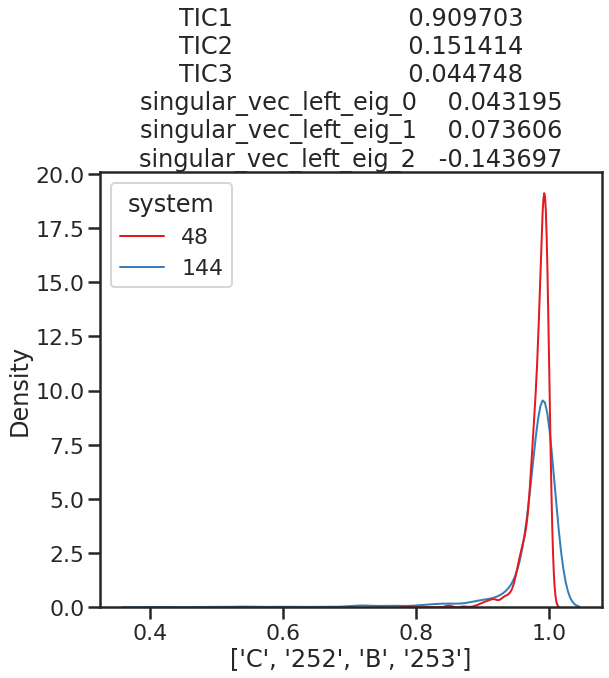

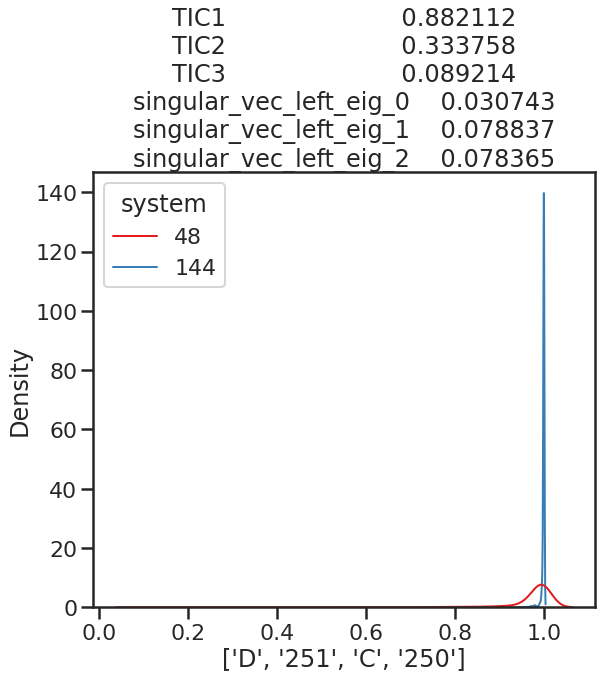

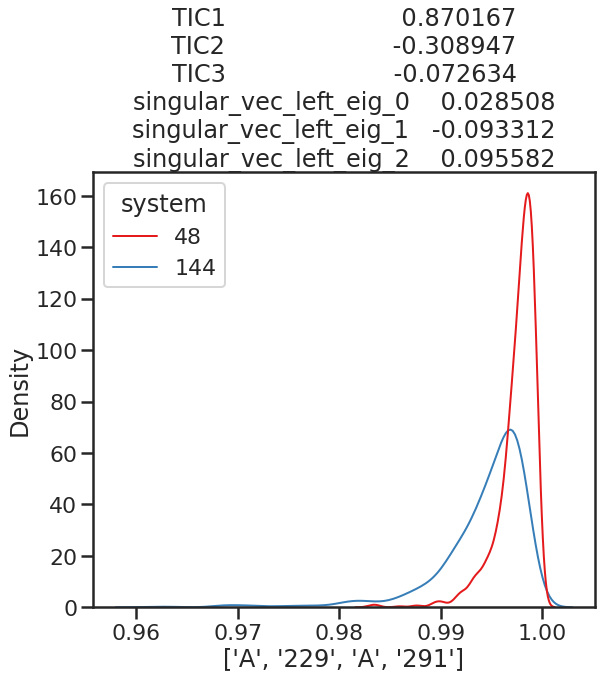

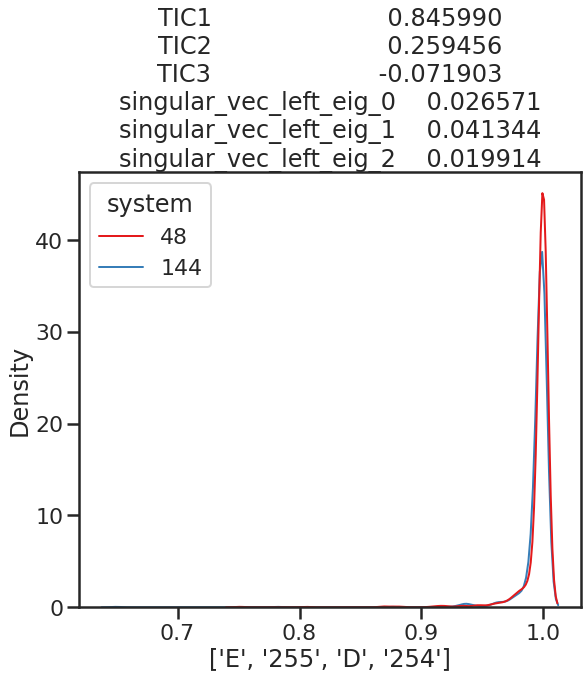

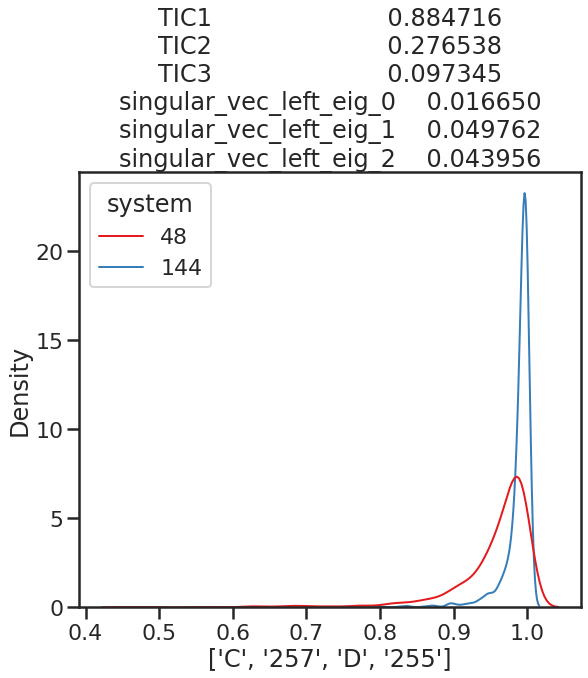

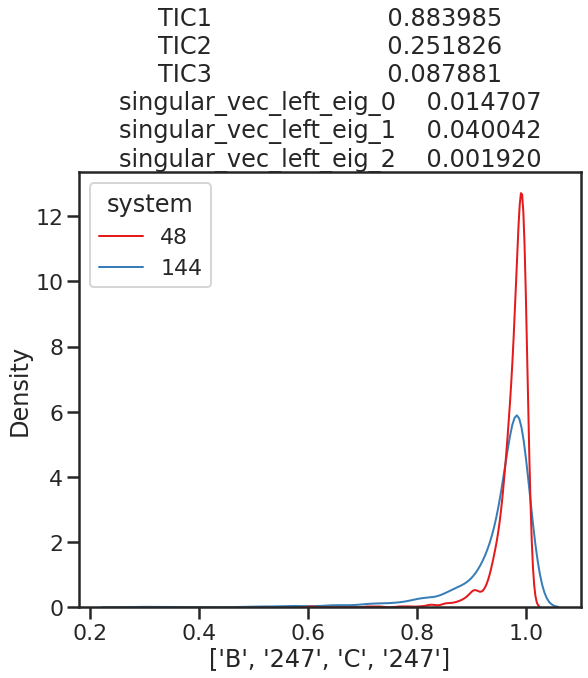

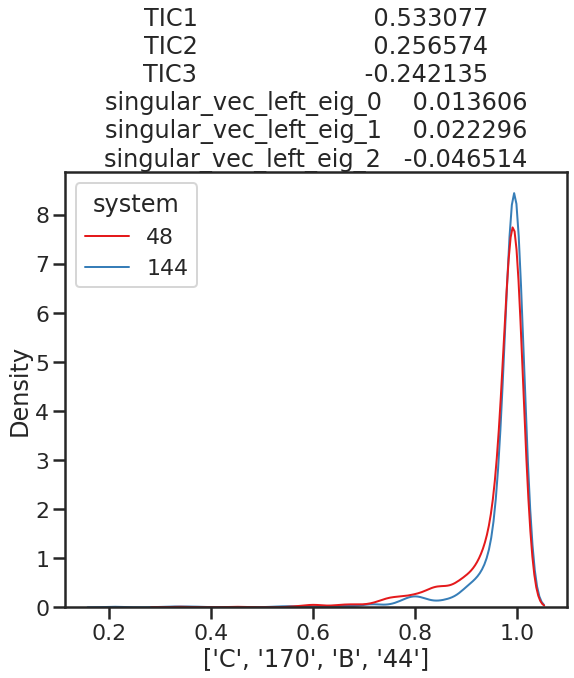

In [ ]:
for feat in feat_index[:50:5]:
    fig, ax = plt.subplots(1, 1, figsize=(9, 8))
    ax = sns.kdeplot(data=feat_all.query('system in [48, 144]'),
                x=feat, ax=ax, hue='system', linewidth=2, legend=True, palette='Set1')
#    ax.legend(labels=feat_all.name.unique(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    x_lab = ax.get_xlabel()
    ax.set_xlabel(x_lab.split('_')[5:])
    ax.set_title(test_feature_TIC_correlation_df.T[feat].to_string().split('/n')[0])
    plt.show()

In [90]:
feat_all = feat_all.query('traj_time >= 100000')

system                                          traj_name  frame  \
0           0  /mnt/cephfs/projects/2021072000_nachrs_a7_msm/...      0   
1           0  /mnt/cephfs/projects/2021072000_nachrs_a7_msm/...      2   
2           0  /mnt/cephfs/projects/2021072000_nachrs_a7_msm/...      4   
3           0  /mnt/cephfs/projects/2021072000_nachrs_a7_msm/...      6   
4           0  /mnt/cephfs/projects/2021072000_nachrs_a7_msm/...      8   
...       ...                                                ...    ...   
219258    194  /mnt/cephfs/projects/2021072000_nachrs_a7_msm/...   2690   
219259    194  /mnt/cephfs/projects/2021072000_nachrs_a7_msm/...   2692   
219260    194  /mnt/cephfs/projects/2021072000_nachrs_a7_msm/...   2694   
219261    194  /mnt/cephfs/projects/2021072000_nachrs_a7_msm/...   2696   
219262    194  /mnt/cephfs/projects/2021072000_nachrs_a7_msm/...   2698   

        traj_time  seed     pathway        ensemble  \
0             0.0     0  BGT_EPJPNU      PRODUCTION   
1          1000.0     0  BGT_EPJPNU      PRODUCTION   
2          2000.0     0  BGT_EPJPNU      PRODUCTION   
3          3000.0     0  BGT_EPJPNU      PRODUCTION   
4          4000.0     0  BGT_EPJPNU      PRODUCTION   
...           ...   ...         ...             ...   
219258  1345000.0    24  EPJPNU_BGT  PRODUCTION_new   
219259  1346000.0    24  EPJPNU_BGT  PRODUCTION_new   
219260  1347000.0    24  EPJPNU_BGT  PRODUCTION_new   
219261  1348000.0    24  EPJPNU_BGT  PRODUCTION_new   
219262  1349000.0    24  EPJPNU_BGT  PRODUCTION_new   

        ca_distance_10A_2diff_logminmax5_A_1_E_18  \
0                                        0.003234   
1                                        0.003630   
2                                        0.007971   
3                                        0.001635   
4                                        0.000610   
...                                           ...   
219258                                   0.000711   
219259                                   0.000134   
219260                                   0.000303   
219261                                   0.000317   
219262                                   0.007733   

        ca_distance_10A_2diff_logminmax5_A_1_E_19  \
0                                        0.018872   
1                                        0.079386   
2                                        0.009247   
3                                        0.021899   
4                                        0.004486   
...                                           ...   
219258                                   0.007465   
219259                                   0.001016   
219260                                   0.002304   
219261                                   0.014125   
219262                                   0.047630   

        ca_distance_10A_2diff_logminmax5_A_1_E_20  ...  \
0                                        0.097399  ...   
1                                        0.314795  ...   
2                                        0.006664  ...   
3                                        0.104428  ...   
4                                        0.009644  ...   
...                                           ...  ...   
219258                                   0.999091  ...   
219259                                   0.990096  ...   
219260                                   0.972880  ...   
219261                                   0.997566  ...   
219262                                   0.999964  ...   

        ca_distance_10A_2diff_J_388_J_392  ca_distance_10A_2diff_J_388_J_393  \
0                                9.389973                           7.515242   
1                                8.245811                           6.349307   
2                                8.694844                           6.902209   
3                                8.837191                           7.302066   
4                               10.018458                           8.3601

In [95]:
feat_all = feat_all.query('traj_time >= 100000').reset_index(drop=True)

In [96]:
feat_all['TIC_1'] = np.concatenate([tica_traj.T[0] for tica_traj in tica_output[::5]])
feat_all['TIC_2'] = np.concatenate([tica_traj.T[1] for tica_traj in tica_output[::5]])
feat_all['TIC_3'] = np.concatenate([tica_traj.T[2] for tica_traj in tica_output[::5]])

In [133]:
feat_all.query('seed in [24]')

array([72, 169, 194], dtype=object)

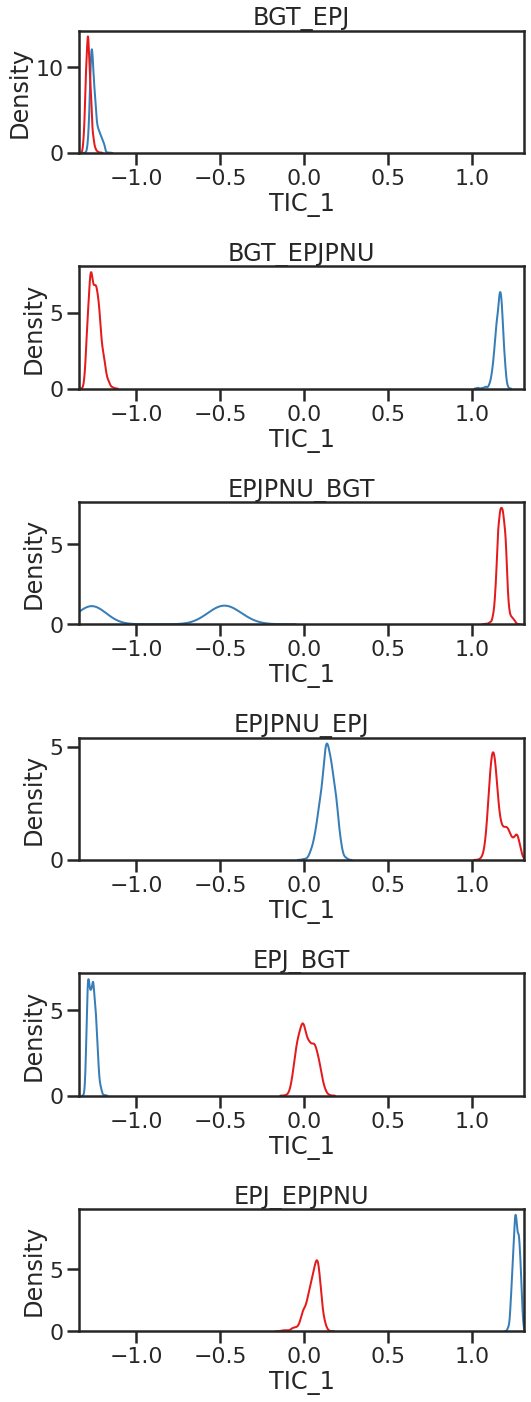

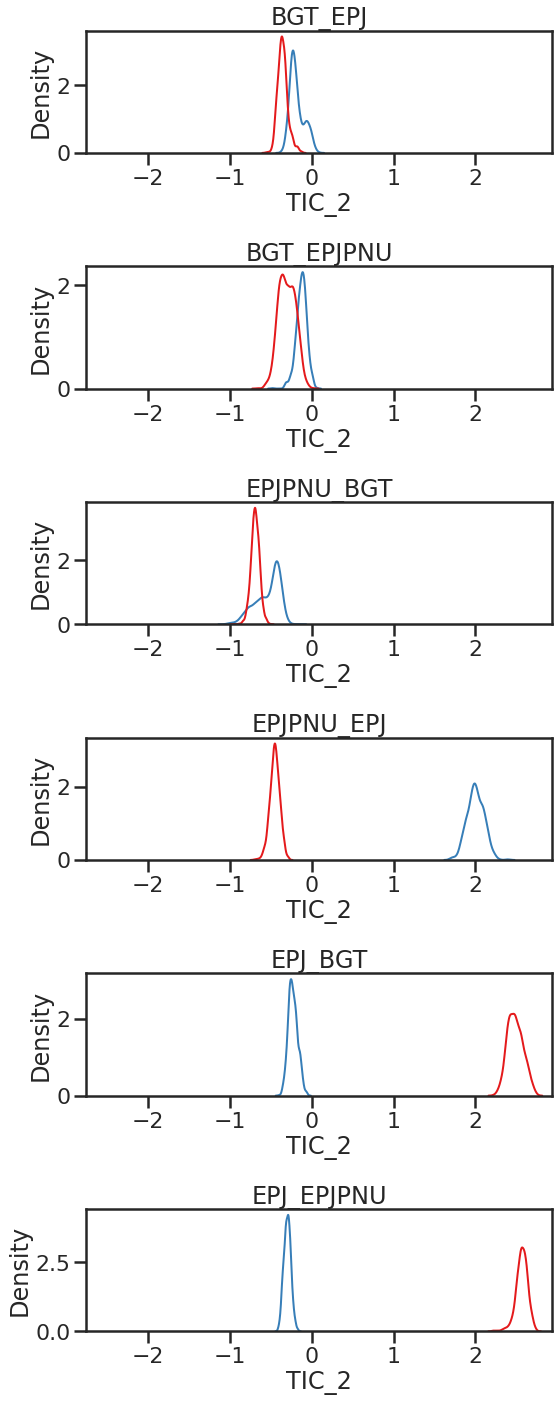

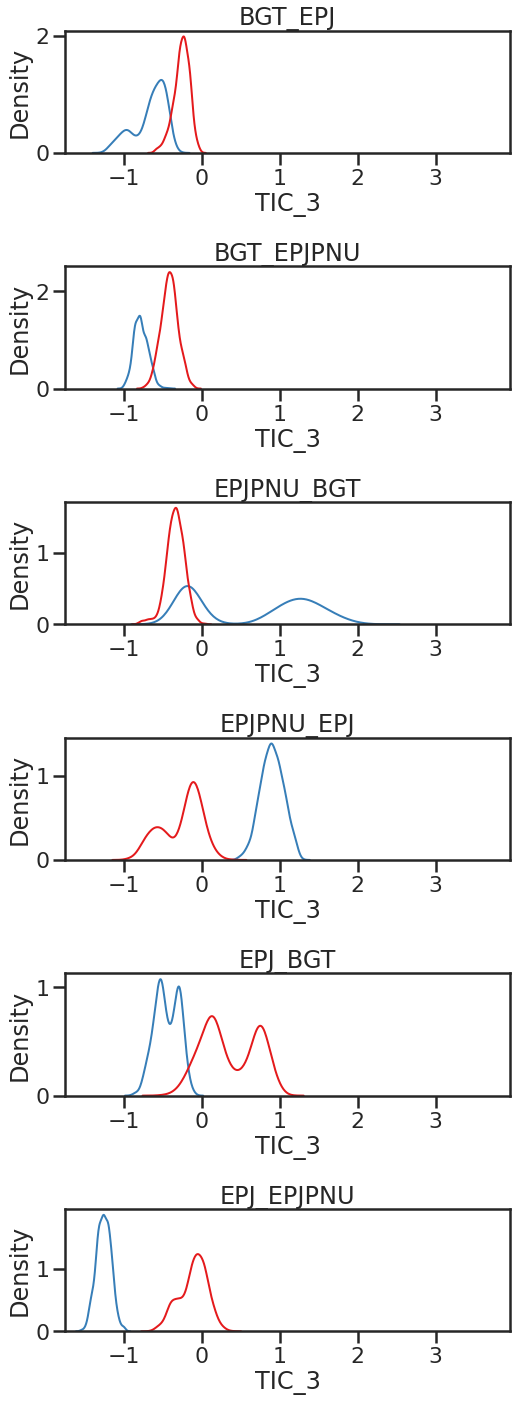

In [144]:
for feat in ['TIC_1', 'TIC_2', 'TIC_3']:
    fig, axes = plt.subplots(6, 1, figsize=(8, 20))
    for (pathway, df), ax in zip(feat_all.groupby('pathway'), axes):
        seed_max = df.seed.unique().max()
        sns.kdeplot(data=df.query('seed in [0, @seed_max]'),
                    x=feat, ax=ax, hue='seed',
                    linewidth=2, legend=False, palette='Set1')
#    ax.legend(labels=feat_all.query('seed in [0, 23]').pathway.unique(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        ax.set_title(pathway)
        ax.set_xlim(feat_all[feat].min(), feat_all[feat].max())
#    x_lab = ax.get_xlabel()
#    ax.set_xlabel(x_lab.split('_')[5:])
#    ax.set_title(test_feature_TIC_correlation_df.T[feat].to_string().split('/n')[0])
    plt.tight_layout()
    plt.show()

In [ ]:
for feat in ['TIC_1', 'TIC_2', 'TIC_3']:
    fig, axes = plt.subplots(6, 1, figsize=(8, 20))
    for (pathway, df), ax in zip(feat_all.groupby('pathway'), axes):
        seed_max = df.seed.unique().max()
        sns.kdeplot(data=df,
                    x=feat, ax=ax, hue='seed',
                    linewidth=2, legend=False, palette='Reds')
#    ax.legend(labels=feat_all.query('seed in [0, 23]').pathway.unique(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        ax.set_title(pathway)
        ax.set_xlim(feat_all[feat].min(), feat_all[feat].max())
#    x_lab = ax.get_xlabel()
#    ax.set_xlabel(x_lab.split('_')[5:])
#    ax.set_title(test_feature_TIC_correlation_df.T[feat].to_string().split('/n')[0])
    plt.tight_layout()
    plt.show()